In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from wordcloud import WordCloud

#for request website 
import requests
import urllib.parse

#for Nlp
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from nltk import ngrams


nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
pd.set_option('display.max_columns', 2000)

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/capstone project/Hotel_Reviews.csv")

#  Data Preparation & Data Cleaning 

In [ ]:
dataframe.head(70)

Hotel_Address  \
0    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
..                                                ...   
65   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
66   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
67   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
68   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
69   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

    Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                            194    8/3/2017            7.7  Hotel Arena   
1                            194    8/3/2017            7.7  Hotel Arena   
2                            194   7/31/2017            7.7  Hotel Arena   
3                            194   7/31/2017            7.7  Hotel Arena   
4                            194   7/24/2017            7.7  Hotel Arena   
..                           ...         ...            ...          ...   
65                           194    1/8/2017            7.7  Hotel Arena   
66                           194  12/29/2016            7.7  Hotel Arena   
67                           194  12/28/2016            7.7  Hotel Arena   
68                           194  12/21/2016            7.7  Hotel Arena   
69                           194  12/20/2016            7.7  Hotel Arena   

      Reviewer_Nationality                                    Negative_Review  \
0                  Russia    I am so angry that i made this post available...   
1                 Ireland                                         No Negative   
2               Australia    Rooms are nice but for elderly a bit difficul...   
3          United Kingdom    My room was dirty and I was afraid to walk ba...   
4             New Zealand    You When I booked with your company on line y...   
..                     ...                                                ...   
65         United Kingdom    Not being told a hedkandi night was across fr...   
66         United Kingdom    Asked for more coffee and sugars only got giv...   
67           South Africa    Room was not cleaned correctly Wine Champagne...   
68   United Arab Emirates    The bathroom was amazing Though we were two f...   
69         United Kingdom    Our room didn t have a sofa in but these two ...   

    Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                 397                     1403   
1                                   0                     1403   
2                                  42                     1403   
3                                 210                     1403   
4                                 140                     1403   
..                                ...                      ...   
65                                 37                     1403   
66                                 40                     1403   
67                                 30                     1403   
68                                 35                     1403   
69                                 46                     1403   

                                      Positive_Review  \
0    Only the park outside of the hotel was beauti...   
1    No real complaints the hotel was great great ...   
2    Location was good and staff were ok It is cut...   
3    Great location in nice surroundings the bar a...   
4     Amazing location and building Romantic setting    
..                                                ...   
65                     Great trip staff very friendly   
66   Nice open room Bed plenty of room Bath room c...   
67   To begin with we were upgraded which made my ...   
68   Beautiful design comfortable room friendly st...   
69   The bath and shower room was amazing Beautif

In [ ]:
dataframe.shape

(515738, 17)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [ ]:
dataframe.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [ ]:
dataframe.duplicated().sum()

526

In [ ]:
dataframe.describe()

Additional_Number_of_Scoring  Average_Score  \
count                 515738.000000  515738.000000   
mean                     498.081836       8.397487   
std                      500.538467       0.548048   
min                        1.000000       5.200000   
25%                      169.000000       8.100000   
50%                      341.000000       8.400000   
75%                      660.000000       8.800000   
max                     2682.000000       9.800000   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
count                      515738.000000            515738.000000   
mean                           18.539450              2743.743944   
std                            29.690831              2317.464868   
min                             0.000000                43.000000   
25%                             2.000000              1161.000000   
50%                             9.000000              2134.000000   
75%                            23.000000              3613.000000   
max                           408.000000             16670.000000   

       Review_Total_Positive_Word_Counts  \
count                      515738.000000   
mean                           17.776458   
std                            21.804185   
min                             0.000000   
25%                             5.000000   
50%                            11.000000   
75%                            22.000000   
max                           395.000000   

       Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
count                               515738.000000   515738.000000   
mean                                     7.166001        8.395077   
std                                     11.040228        1.637856   
min                                      1.000000        2.500000   
25%                                      1.000000        7.500000   
50%                                      3.000000        8.800000   
75%                                      8.000000        9.600000   
max                                    355.000000       10.000000   

                 lat            lng  
count  512470.000000  512470.000000  
mean       49.442439       2.823803  
std         3.466325       4.579425  
min        41.328376      -0.369758  
25%        48.214662      -0.143372  
50%        51.499981       0.010607  
75%        51.516288       4.834443  
max        52.400181      16.429233

In [ ]:
dataframe.describe(include = "object")

Hotel_Address Review_Date  \
count                                              515738      515738   
unique                                               1493         731   
top     163 Marsh Wall Docklands Tower Hamlets London ...    8/2/2017   
freq                                                 4789        2585   

                                        Hotel_Name Reviewer_Nationality  \
count                                       515738               515738   
unique                                        1492                  227   
top     Britannia International Hotel Canary Wharf      United Kingdom    
freq                                          4789               245246   

       Negative_Review Positive_Review  \
count           515738          515738   
unique          330011          412601   
top        No Negative     No Positive   
freq            127890           35946   

                                                     Tags days_since_review  
count                                              515738            515738  
unique                                              55242               731  
top     [' Leisure trip ', ' Couple ', ' Double Room '...            1 days  
freq                                                 5101              2585

In [ ]:
dataframe['Hotel_Address'].value_counts()

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
21 rue Lavoisier 8th arr 75008 Paris France                                         12
2 4 Boundary Street Hackney London E2 7DD United Kingdom                            12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              8
Name: Hotel_Address, Length: 1493, dtype: i

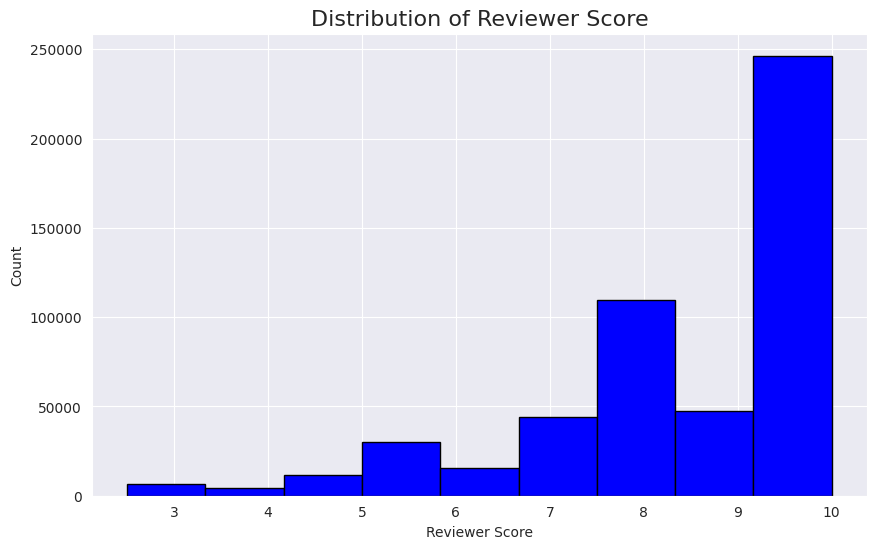

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(dataframe['Reviewer_Score'], bins=9, color='blue', edgecolor='black')
plt.title('Distribution of Reviewer Score', fontsize=16)
plt.xlabel('Reviewer Score')
plt.ylabel('Count')
plt.show()

In [ ]:
# converting the review score to an integer (1-10)
dataframe['Reviewer_Score'] = dataframe['Reviewer_Score'].astype(int)

# print results
dataframe['Reviewer_Score'].sample(5)

38785      7
400850    10
18690      9
357256     7
407992    10
Name: Reviewer_Score, dtype: int64

In [ ]:
def find_numeric_and_non_numeric_columns(df):
    numeric_columns = []
    non_numeric_columns = []
    for column in dataframe.columns:
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            numeric_columns.append(column)
        else:
            non_numeric_columns.append(column)

    print(f'The numeric columns are: {numeric_columns}')
    print(f'The non-numeric columns are: {non_numeric_columns}')

find_numeric_and_non_numeric_columns(dataframe)

The numeric columns are: ['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'lat', 'lng']
The non-numeric columns are: ['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review', 'Tags', 'days_since_review']


In [ ]:
# non numeric data
for column in dataframe.columns:
    if dataframe[column].dtype == 'object':
        print(f'The unique values in the {column} column are: {dataframe[column].unique()}')

The unique values in the Hotel_Address column are: [' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands'
 '1 15 Templeton Place Earl s Court Kensington and Chelsea London SW5 9NB United Kingdom'
 '1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom'
 ...
 'Wilton Place Knightsbridge Westminster Borough London SW1X 7RL United Kingdom'
 'Wrights Lane Kensington and Chelsea London W8 5SP United Kingdom'
 'Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria']
The unique values in the Review_Date column are: ['8/3/2017' '7/31/2017' '7/24/2017' '7/17/2017' '7/9/2017' '7/8/2017'
 '7/7/2017' '7/6/2017' '7/4/2017' '7/3/2017' '6/30/2017' '6/29/2017'
 '6/20/2017' '6/19/2017' '6/12/2017' '6/10/2017' '5/29/2017' '5/27/2017'
 '5/25/2017' '5/22/2017' '5/21/2017' '5/16/2017' '5/11/2017' '5/9/2017'
 '5/2/2017' '4/27/2017' '4/26/2017' '4/20/2017' '4/19/2017' '4/18/2017'
 '4/16/2017' '4/14/2017' '4/10/2017' '4/5/2017' '3/29/2017' '3/22/2017'
 '3/20/2017' '3/19/20

In [ ]:
# binning the Reviewer_Score column into 2 categories: 0 for bad reviews (0-8) and 1 for good reviews (9-10)
dataframe['Reviewer_Score'] = dataframe['Reviewer_Score'].apply(lambda x: 0 if x <= 8 else 1)

# checking the results
dataframe['Reviewer_Score'].value_counts()

0    268701
1    247037
Name: Reviewer_Score, dtype: int64

In [ ]:
dataframe['Tags'].value_counts()

[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                  5101
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                         4931
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                         4366
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                           3991
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']                                 3291
                                                                                                                                         ... 
[' Leisure trip ', ' Family with older children ', ' Suite Family Room ', ' Stayed 5 nights ', ' Submitted from a mobile device ']          1
[' Bus

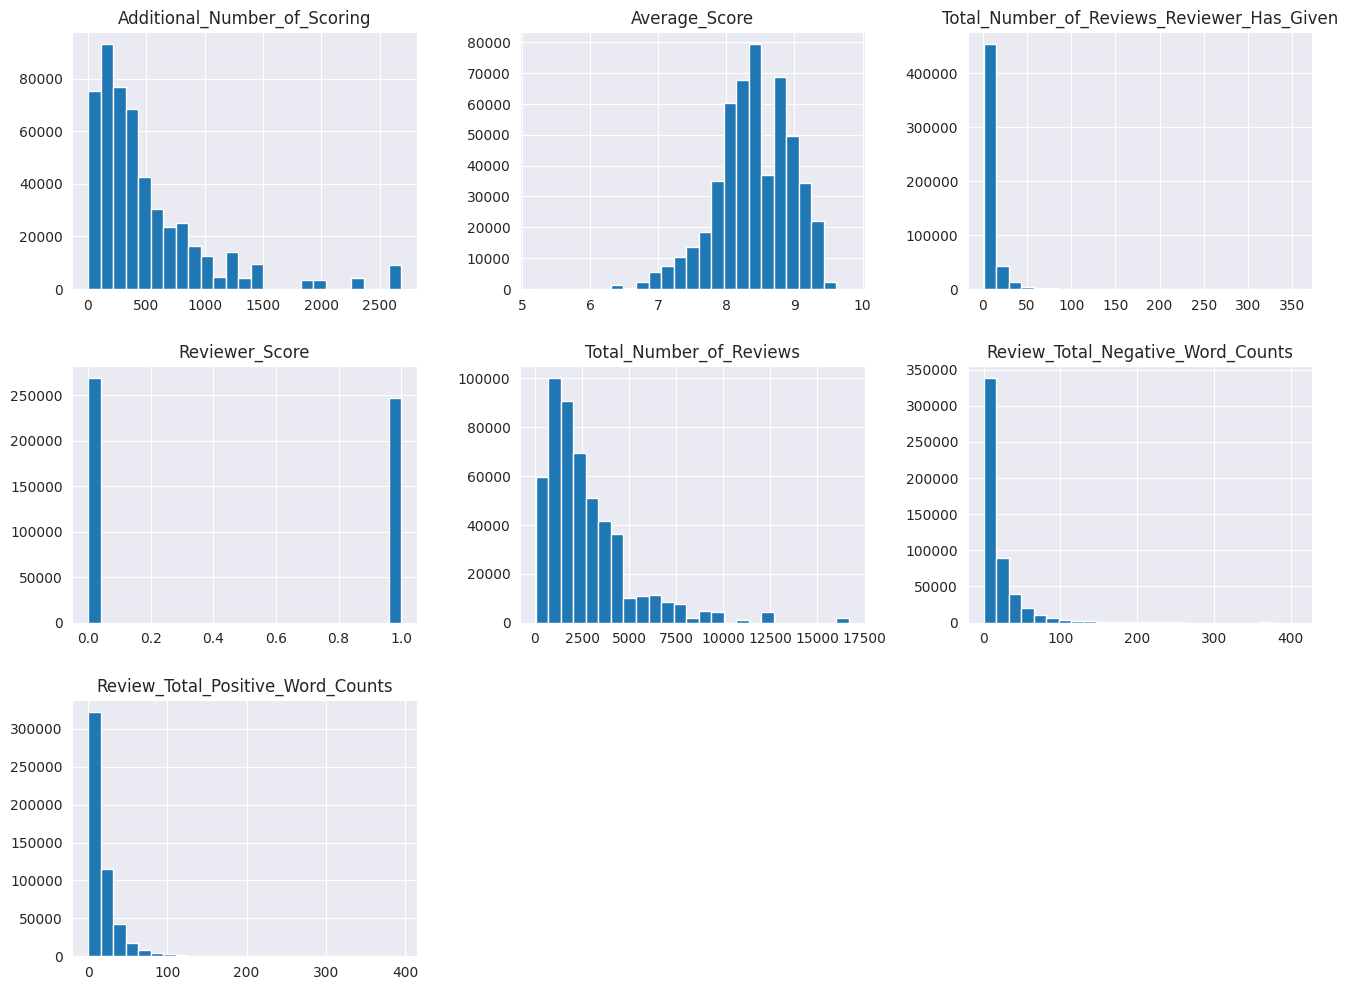

In [ ]:
dataframe[['Average_Score','Additional_Number_of_Scoring',
    'Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score','Total_Number_of_Reviews','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts']].hist(bins=25,figsize=(16,12))
plt.show()

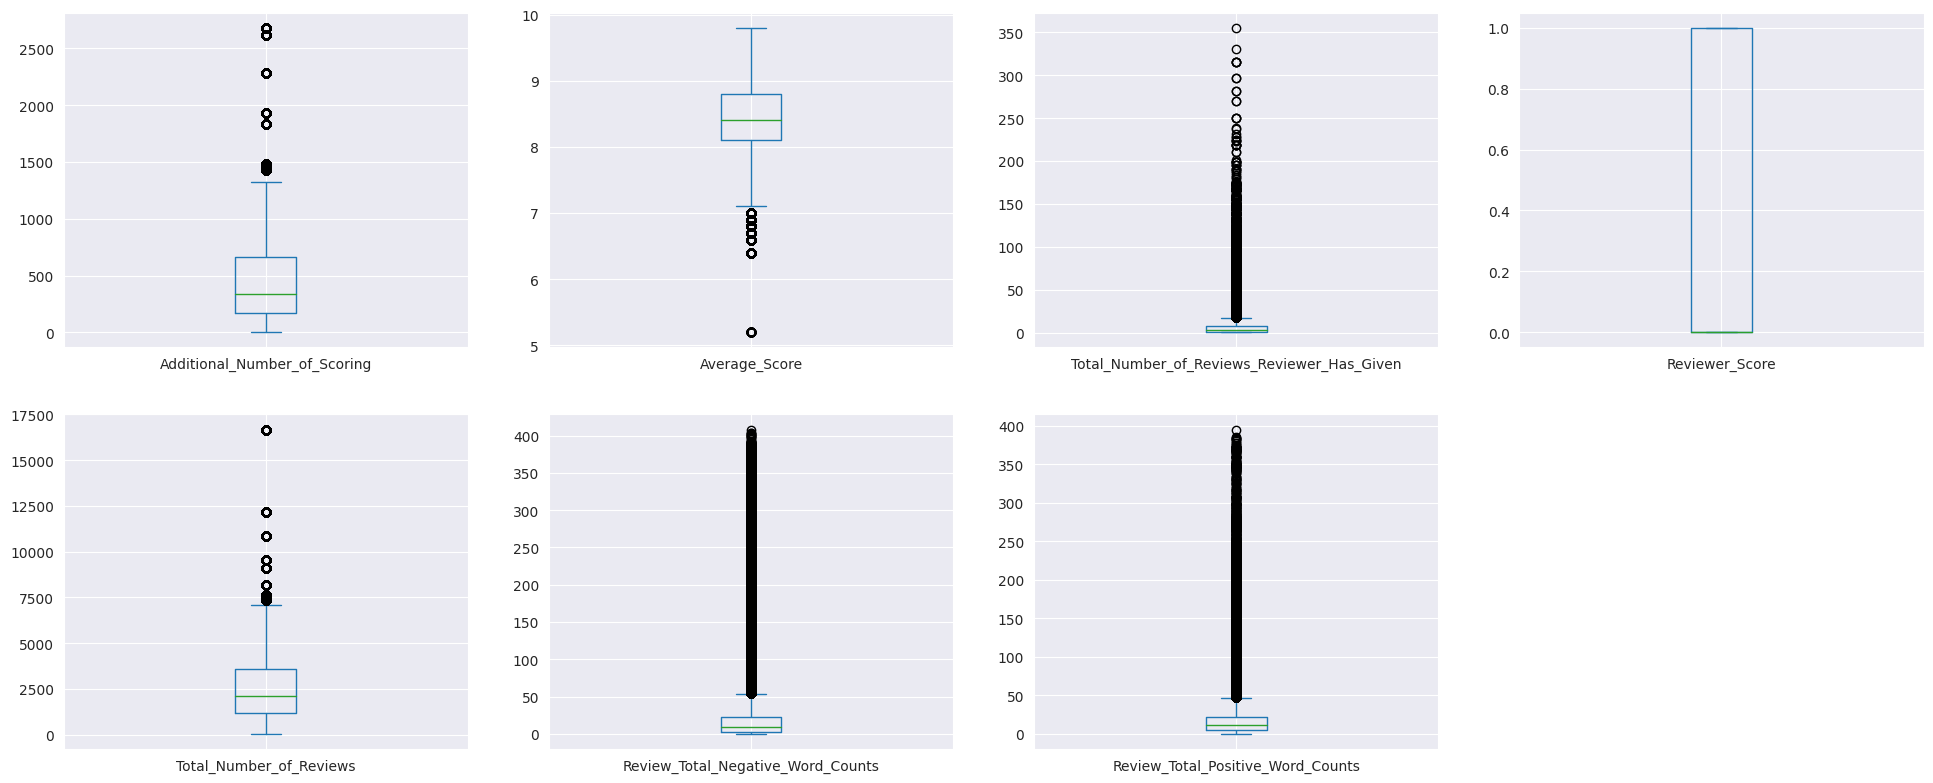

In [ ]:
dataframe[['Additional_Number_of_Scoring','Average_Score',
    'Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score','Total_Number_of_Reviews','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts']].plot(kind = "box" , subplots = True , figsize = (24,20) ,  layout = (4,4))
plt.show()

In [ ]:
dataframe["Hotel_Name"].nunique()

1492

In [ ]:
df_copy=dataframe.copy()

In [ ]:
df_copy['Reviewer_Nationality']=df_copy['Reviewer_Nationality'].str.strip()

In [ ]:
Arabic_Region=['United Arab Emirates',
 'South Sudan',
 'Palestinian Territory',
 'Sudan',
 'Jordan',
 'Kuwait',
 'Bahrain',
 'Egypt',
 'Lebanon',
 'Qatar',
 'Morocco',
 'Oman',
 'Saudi Arabia',
 'United Arab Emirates',
 'Somalia',
 'Liberia',
 'Syria',
 'Mauritania',
 'Yemen',
 'Tunisia',
 'Algeria',
 'Iraq',
 'Libya']

In [ ]:
data_countries=pd.read_csv('/content/drive/MyDrive/capstone project/countryContinent.csv', encoding='ISO-8859-1')

In [ ]:
data_countries.head(10)

country code_2 code_3  country_code     iso_3166_2 continent  \
0          Afghanistan     AF    AFG             4  ISO 3166-2:AF      Asia   
1        Åland Islands     AX    ALA           248  ISO 3166-2:AX    Europe   
2              Albania     AL    ALB             8  ISO 3166-2:AL    Europe   
3              Algeria     DZ    DZA            12  ISO 3166-2:DZ    Africa   
4       American Samoa     AS    ASM            16  ISO 3166-2:AS   Oceania   
5              Andorra     AD    AND            20  ISO 3166-2:AD    Europe   
6               Angola     AO    AGO            24  ISO 3166-2:AO    Africa   
7             Anguilla     AI    AIA           660  ISO 3166-2:AI  Americas   
8           Antarctica     AQ    ATA            10  ISO 3166-2:AQ       NaN   
9  Antigua and Barbuda     AG    ATG            28  ISO 3166-2:AG  Americas   

        sub_region  region_code  sub_region_code  
0    Southern Asia        142.0             34.0  
1  Northern Europe        150.0            154.0  
2  Southern Europe        150.0             39.0  
3  Northern Africa          2.0             15.0  
4        Polynesia          9.0             61.0  
5  Southern Europe        150.0             39.0  
6    Middle Africa          2.0             17.0  
7        Caribbean         19.0             29.0  
8              NaN          NaN              NaN  
9        Caribbean         19.0             29.0

In [ ]:
europe_list = []
for j in range(len(data_countries)):
    if data_countries['continent'][j] == 'Europe':
        europe_list.append(data_countries['country'][j])

asia_list = []
for j in range(len(data_countries)):
    if data_countries['continent'][j] == 'Asia':
        asia_list.append(data_countries['country'][j])

northamerica_list = []
for j in range(len(data_countries)):
    if data_countries['continent'][j] == 'North America':
        northamerica_list.append(data_countries['country'][j])

southamerica_list = []
for j in range(len(data_countries)):
    if data_countries['continent'][j] == 'South America':
        southamerica_list.append(data_countries['country'][j])
        
oceania_list = []
for j in range(len(data_countries)):
    if data_countries['continent'][j] == 'Oceania':
        oceania_list.append(data_countries['country'][j])

africa_list = []
for j in range(len(data_countries)):
    if data_countries['continent'][j] == 'Africa':
        africa_list.append(data_countries['country'][j])

americas_list = []
for j in range(len(data_countries)):
    if data_countries['continent'][j] == 'Americas':
        americas_list.append(data_countries['country'][j])

In [ ]:
oceania_list

['American Samoa',
 'Australia',
 'Cook Islands',
 'Fiji',
 'French Polynesia',
 'Guam',
 'Kiribati',
 'Marshall Islands',
 'Micronesia (Federated States of)',
 'Nauru',
 'New Caledonia',
 'New Zealand',
 'Niue',
 'Norfolk Island',
 'Northern Mariana Islands',
 'Palau',
 'Papua New Guinea',
 'Pitcairn',
 'Samoa',
 'Solomon Islands',
 'Tokelau',
 'Tonga',
 'Tuvalu',
 'Vanuatu',
 'Wallis and Futuna']

In [ ]:

europe_list[14] = 'Ireland'        
europe_list[23] = 'Netherlands'
asia_list[7] = 'China'

In [ ]:
#Adding continent column to data
continent = []
for k in range(len(df_copy)):
    if df_copy['Reviewer_Nationality'][k] in europe_list:
        continent.append("Europe")
    elif df_copy['Reviewer_Nationality'][k] in asia_list:
        continent.append("Asia")
    elif df_copy['Reviewer_Nationality'][k] in africa_list:
        continent.append("Africa")
    elif df_copy['Reviewer_Nationality'][k] in oceania_list:
        continent.append("Oceania")
    elif df_copy['Reviewer_Nationality'][k] in americas_list:
        continent.append("Americas")
    elif df_copy['Reviewer_Nationality'][k] in Arabic_Region:
        continent.append("Arabic_Region")
    elif df_copy['Reviewer_Nationality'][k] == 'United Kingdom':
        continent.append('United Kingdom')
    else:
        continent.append("Other")

continent = pd.Series(continent)

In [ ]:
df_copy['regions'] = continent

In [ ]:
df_copy['regions'].value_counts()

United Kingdom    245246
Europe            101814
Asia               69686
Americas           48344
Oceania            24999
Other              16681
Africa              8881
Arabic_Region         87
Name: regions, dtype: int64

In [ ]:
df_copy.drop_duplicates(inplace=True,ignore_index=True)

In [ ]:
dataframe["Reviewer_Score"].value_counts(dropna = False)

0    268701
1    247037
Name: Reviewer_Score, dtype: int64

In [ ]:
#  to find the unique values in the Hotel_Address column
v_counts = dataframe['Hotel_Address'].value_counts()

#  nunique() method to find the number of unique values in address
n_uniq = dataframe['Hotel_Address'].nunique()

print(v_counts)
print(f'There are {n_uniq} unique values in the Hotel_Address column.')

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
21 rue Lavoisier 8th arr 75008 Paris France                                         12
2 4 Boundary Street Hackney London E2 7DD United Kingdom                            12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              8
Name: Hotel_Address, Length: 1493, dtype: i

In [ ]:
# checking the city and country from the Hotel_Address column
dataframe['Hotel_City_Country'] = dataframe['Hotel_Address'].str.split(' ').str[-2:]

# checking the results
dataframe['Hotel_City_Country']

0         [Amsterdam, Netherlands]
1         [Amsterdam, Netherlands]
2         [Amsterdam, Netherlands]
3         [Amsterdam, Netherlands]
4         [Amsterdam, Netherlands]
                    ...           
515733           [Vienna, Austria]
515734           [Vienna, Austria]
515735           [Vienna, Austria]
515736           [Vienna, Austria]
515737           [Vienna, Austria]
Name: Hotel_City_Country, Length: 515738, dtype: object

In [ ]:
# removing the square bracketsin coloumns
dataframe['Hotel_City_Country'] = dataframe['Hotel_City_Country'].str.join(' ').str.replace('[', '').str.replace(']', '')

# checking the results
dataframe['Hotel_City_Country'].value_counts()

<ipython-input-120-7658c87efb8f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataframe['Hotel_City_Country'] = dataframe['Hotel_City_Country'].str.join(' ').str.replace('[', '').str.replace(']', '')


United Kingdom           262301
Barcelona Spain           60149
Paris France              59928
Amsterdam Netherlands     57214
Vienna Austria            38939
Milan Italy               37207
Name: Hotel_City_Country, dtype: int64

In [ ]:
# moving duplicates with the correct values
dataframe['Hotel_City_Country'] = dataframe['Hotel_City_Country'].str.replace('Wien,', 'Vienna').str.replace('Paris,', 'Paris').str.replace('Barcelona,', 'Barcelona').str.replace('United Kingdom', 'London United Kingdom')

# checking the results
dataframe['Hotel_City_Country'].value_counts()

London United Kingdom    262301
Barcelona Spain           60149
Paris France              59928
Amsterdam Netherlands     57214
Vienna Austria            38939
Milan Italy               37207
Name: Hotel_City_Country, dtype: int64

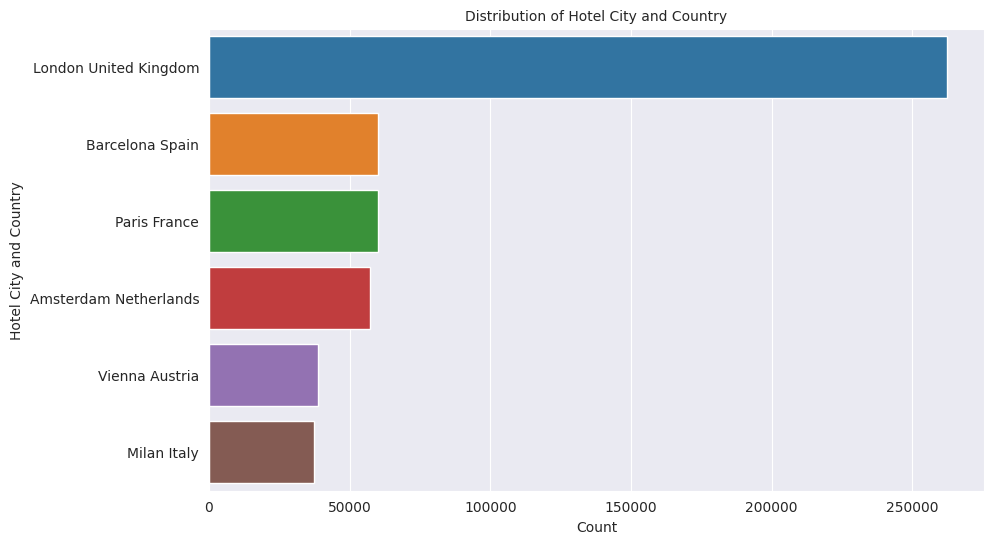

In [ ]:
# Distribution of the Hotel_City_Country column
plt.figure(figsize=(10, 6))
sns.countplot(y=dataframe['Hotel_City_Country'], order=dataframe['Hotel_City_Country'].value_counts().index)
plt.title('Distribution of Hotel City and Country', fontsize=10)
plt.xlabel('Count')
plt.ylabel('Hotel City and Country')
plt.show()

In [ ]:
# To convert the Hotel_City_Country column to dummy variables
hotel_df = pd.get_dummies(dataframe, columns=['Hotel_City_Country'], drop_first=True)

# checking the results
print(hotel_df.columns)



Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Hotel_City_Country_Barcelona Spain',
       'Hotel_City_Country_London United Kingdom',
       'Hotel_City_Country_Milan Italy', 'Hotel_City_Country_Paris France',
       'Hotel_City_Country_Vienna Austria'],
      dtype='object')


Hotel_Address  \
88074   2 Bridge Place Victoria Westminster Borough Lo...   
401319  Passeig de Picasso 26 30 Ciutat Vella 08003 Ba...   
472697  Via De Amicis 32 Milan City Center 20123 Milan...   
325768  Fulham Road Stamford Bridge Hammersmith and Fu...   
356412  Keizersgracht 164 Amsterdam City Center 1015 C...   
161651  36 37 Lancaster Gate Westminster Borough Londo...   
289290       Breite Gasse 9 07 Neubau 1070 Vienna Austria   
299558  Chelsea Harbour Hammersmith and Fulham London ...   
84646   2 24 Kensington High St Kensington and Chelsea...   
182130  40 trinity square City of London London EC3N 4...   
489693                 Via Senigallia 6 20161 Milan Italy   
241495  71 79 Southwark Street Southwark London SE1 0J...   
138060  3 South Place City of London London EC2M 2AF U...   
329766        Gran Via 550 Eixample 08011 Barcelona Spain   
336317  Gutheil Schoder Gasse 7B 10 Favoriten 1100 Vie...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
88074                            660   2/16/2016            8.4   
401319                           211    7/7/2016            8.9   
472697                            44    8/1/2017            7.5   
325768                           525    2/7/2016            8.2   
356412                           197   1/19/2016            9.4   
161651                           322    4/8/2016            8.4   
289290                           199  12/27/2015            8.4   
299558                           326   6/26/2017            8.6   
84646                            617   6/24/2017            8.8   
182130                           832   9/13/2016            9.1   
489693                           904  11/21/2016            8.1   
241495                           237   4/19/2016            8.5   
138060                           235    4/6/2017            9.3   
329766                           167   8/16/2016            8.8   
336317                           283   10/1/2015            8.3   

                                               Hotel_Name  \
88074                DoubleTree by Hilton London Victoria   
401319                                  K K Hotel Picasso   
472697                                Hotel Pierre Milano   
325768  Millennium Copthorne Hotels at Chelsea Footbal...   
356412                                          The Toren   
161651                                    Arbor Hyde Park   
289290                  Hotel ViennArt am Museumsquartier   
299558                          The Chelsea Harbour Hotel   
84646                                  Royal Garden Hotel   
182130                           citizenM Tower of London   
489693                                     Hotel Da Vinci   
241495                              Mercure London Bridge   
138060                                  South Place Hotel   
329766                            Hotel Vueling Bcn by HC   
336317                     Austria Trend Hotel Bosei Wien   

              Reviewer_Nationality  \
88074              United Kingdom    
401319             United Kingdom    
472697   United States of America    
325768             United Kingdom    
356412             United Kingdom    
161651                      Japan    
289290                    Belgium    
299558             United Kingdom    
84646              United Kingdom    
182130             United Kingdom    
489693                    Estonia    
241495             United Kingdom    
138060             United Kingdom    
329766                     Norway    
336317                    Finland    

                                          Negative_Review  \
88074                                     I can fault it    
401319   Would have preferred a firmer mattress and sh...   
472697   On arrival there was a very friendly gentlema...   
325768                                        No Negative   
356412                                            Nothing   
161651   Bath room was small and we may ha

# nltk features

In [ ]:
import pandas as pd

# read data
reviews_df = pd.read_csv("/content/drive/MyDrive/capstone project/Hotel_Reviews.csv")
# append the positive and negative text reviews
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]
# create the label
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
# select only relevant columns
reviews_df = reviews_df[["review", "is_bad_review"]]
reviews_df.head()

review  is_bad_review
0   I am so angry that i made this post available...              1
1  No Negative No real complaints the hotel was g...              0
2   Rooms are nice but for elderly a bit difficul...              0
3   My room was dirty and I was afraid to walk ba...              1
4   You When I booked with your company on line y...              0

In [ ]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

In [ ]:
# remove 'No Negative' or 'No Positive'
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:


def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    


def clean_text(t):
    # lowering the text
    t = t.lower()
    # tokenize text and remove puncutation
    t = [word.strip(string.punctuation) for word in t.split(" ")]
    # remove words that contain numbers
    t = [word for word in t if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    t = [x for x in t if x not in stop]
    # remove empty tokens
    t = [t for t in t if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(t)
    # lemmatize text
    t = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    t = [t for t in t if len(t) > 1]
    # join all
    t = " ".join(t)
    return(t)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))


In [ ]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

#  words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [ ]:
# creating doc2vec vector 
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our dataset
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vectors
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [ ]:
# add tf-idfs columns
from sklearn.feature_extraction.t import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [ ]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.956761
1    0.043239
Name: is_bad_review, dtype: float64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


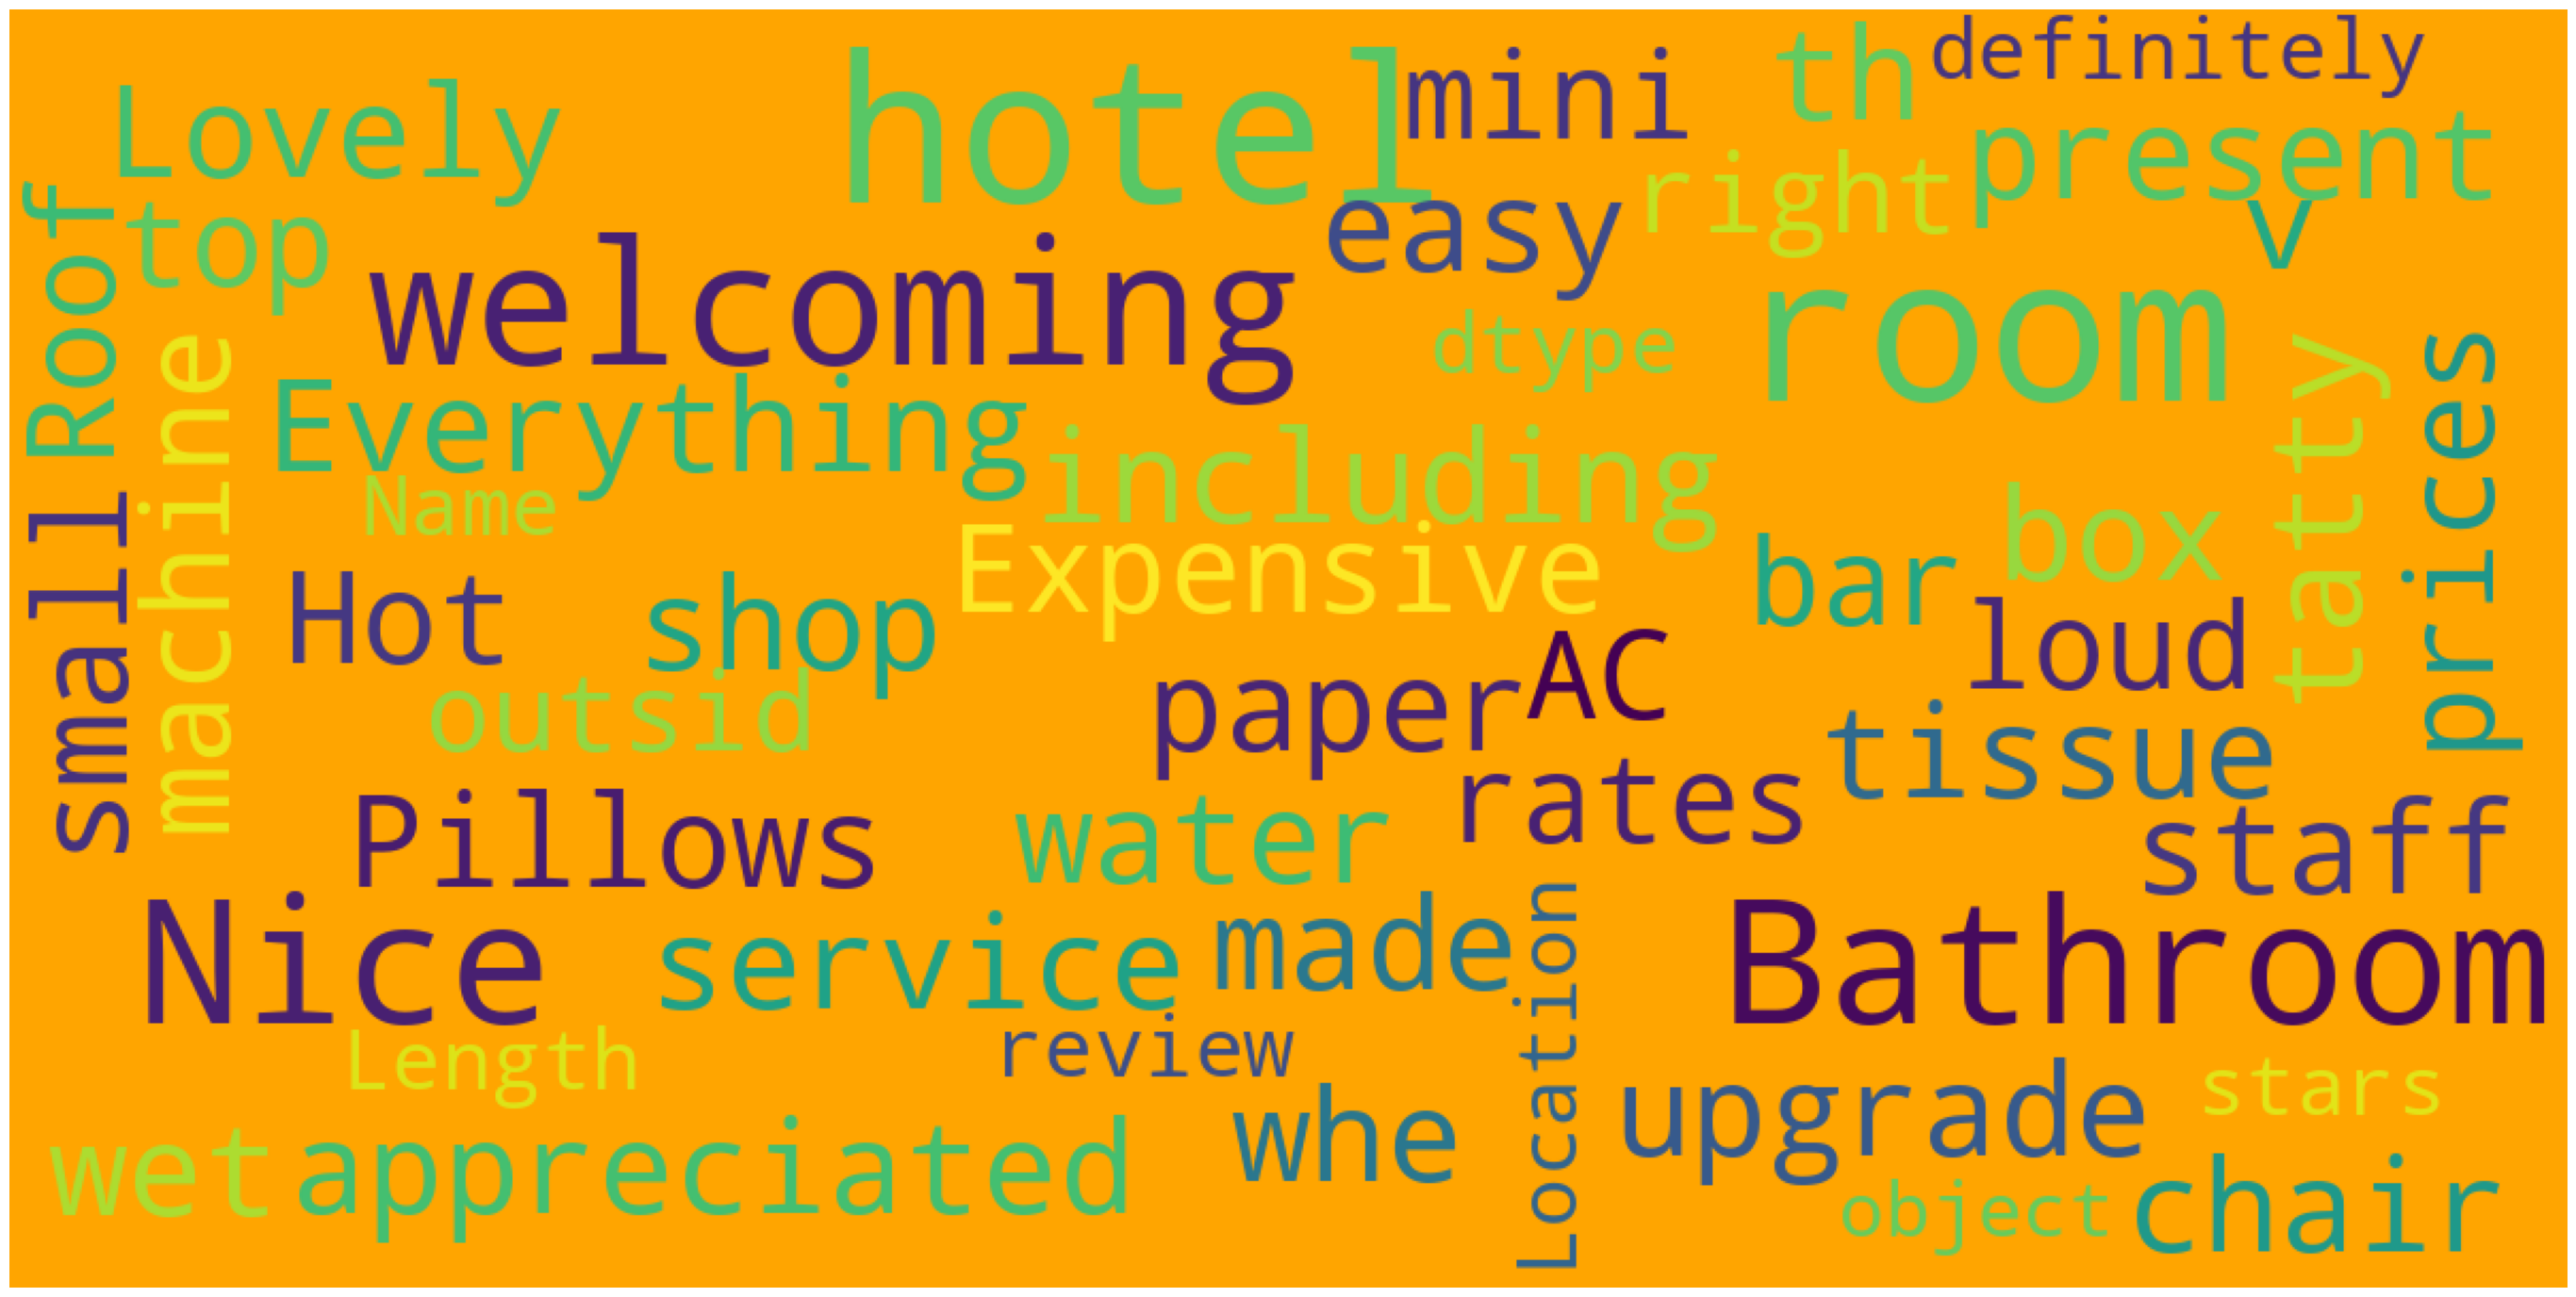

In [ ]:
# wordcloud function
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'Orange',
        max_words = 400,
        max_font_size = 32, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (35, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 15)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# wordcloud
show_wordcloud(reviews_df["review"])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(18)

review    pos
43101          A perfect location comfortable great value  0.931
211742                     Clean comfortable lovely staff  0.907
175551                  Friendly welcome Comfortable room  0.905
365085                          Good location great value  0.904
109564                     Clean friendly and comfortable  0.902
145743                        Good value amazing location  0.901
407590                  breakfast excellent Clean comfort  0.899
407546                             Great place I enjoyed   0.881
218571                      Beautiful Quirky Comfortable   0.878
436901                          Lovely comfortable rooms   0.877
128308                              Super friendly staff   0.877
351963                   Comfortable excellent breakfast   0.875
151468        Welcoming great Food good Service excellent  0.872
90314      Very friendly welcoming manager Super helpful   0.870
24173        Great staff helpful and friendly Impressive   0.870
407577                        i liked everything perfect   0.867
442568   Excellent location friendly staff clean comfo...  0.866
200631                          Clean Excellent location   0.865

In [ ]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

review    neg
193086                      No dislikes LOCATION   0.831
356368    Nothing  Great helpful wonderful staff   0.812
318516                        A disaster  Nothing  0.804
458794   Nothing Excellent friendly helpful staff  0.799
29666                              A bit noisy No  0.796
426057                     Dirty hotel Smells bad  0.762
263187                        Very bad service No  0.758
443796                          Nothing  perfect   0.750
181508                    Window blind was broken  0.744
175316               Nothing Super friendly staff  0.743

<ipython-input-141-78be2137db92>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)
<ipython-input-141-78be2137db92>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)


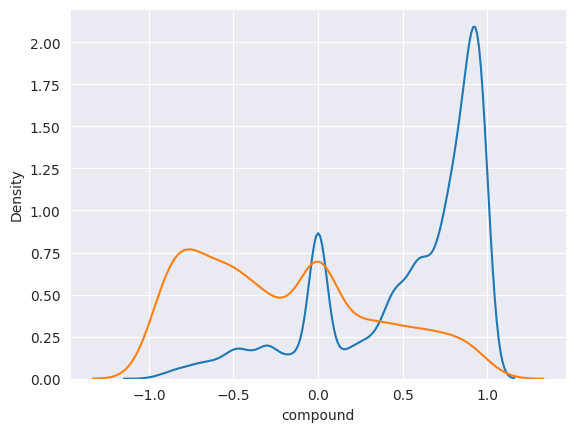

In [ ]:
# sentiment distribution for the positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [ ]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

In [ ]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show features
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
3             compound    0.038038
2                  pos    0.026092
6     doc2vec_vector_0    0.023775
0                  neg    0.021944
8     doc2vec_vector_2    0.018563
10    doc2vec_vector_4    0.017657
9     doc2vec_vector_3    0.016880
7     doc2vec_vector_1    0.016724
4             nb_chars    0.016381
1                  neu    0.014917
5             nb_words    0.014676
2239      word_nothing    0.009649
2853         word_room    0.009636
285           word_bad    0.009422
950         word_dirty    0.009243
1945     word_location    0.006851
2284          word_old    0.006648
3216         word_star    0.006621
3202        word_staff    0.006617
2867         word_rude    0.006437

0.8933398881102281


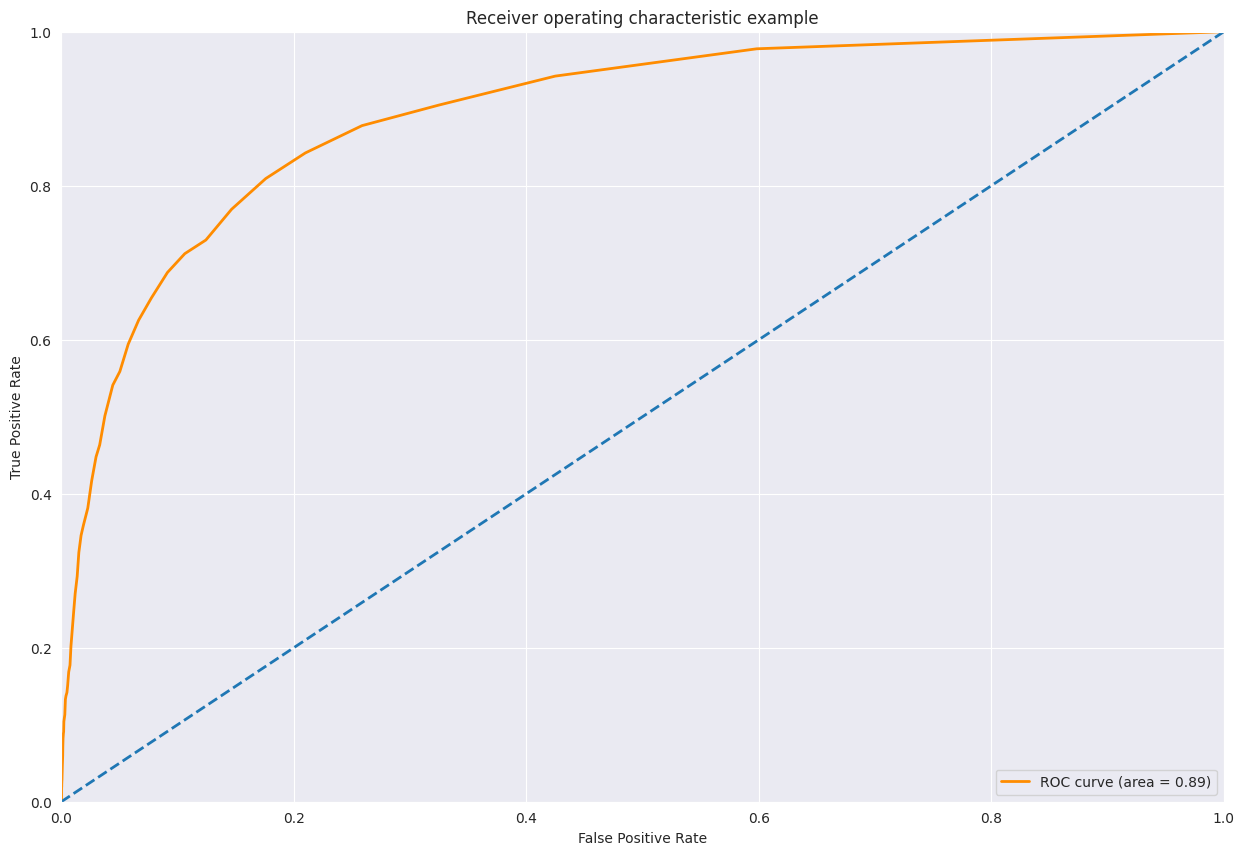

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

#roc_auc = auc(fpr, tpr)
roc_auc=roc_auc_score(y_test, y_pred)
print(roc_auc)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.36')

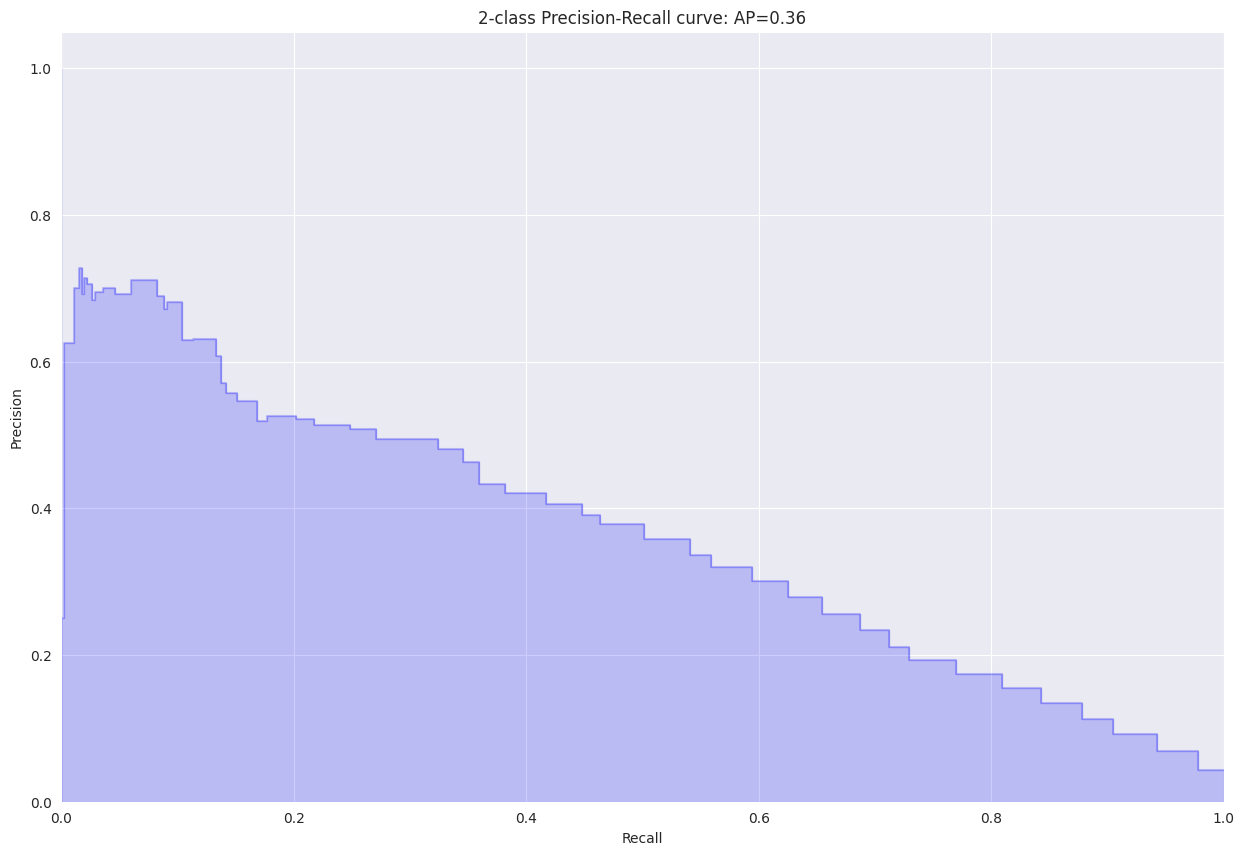

In [ ]:
# PR curve

!pip install funcsigs
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [ ]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

#  train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 30)

In [ ]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 30)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
3             compound    0.040974
2                  pos    0.023811
0                  neg    0.021749
6     doc2vec_vector_0    0.021688
10    doc2vec_vector_4    0.018144
8     doc2vec_vector_2    0.017300
7     doc2vec_vector_1    0.016937
4             nb_chars    0.016768
9     doc2vec_vector_3    0.015885
1                  neu    0.015679
5             nb_words    0.014408
950         word_dirty    0.010090
2853         word_room    0.009537
2239      word_nothing    0.009316
285           word_bad    0.008681
3202        word_staff    0.007104
3216         word_star    0.006688
1945     word_location    0.006620
2867         word_rude    0.006544
1639        word_hotel    0.006243

0.8885177699174667


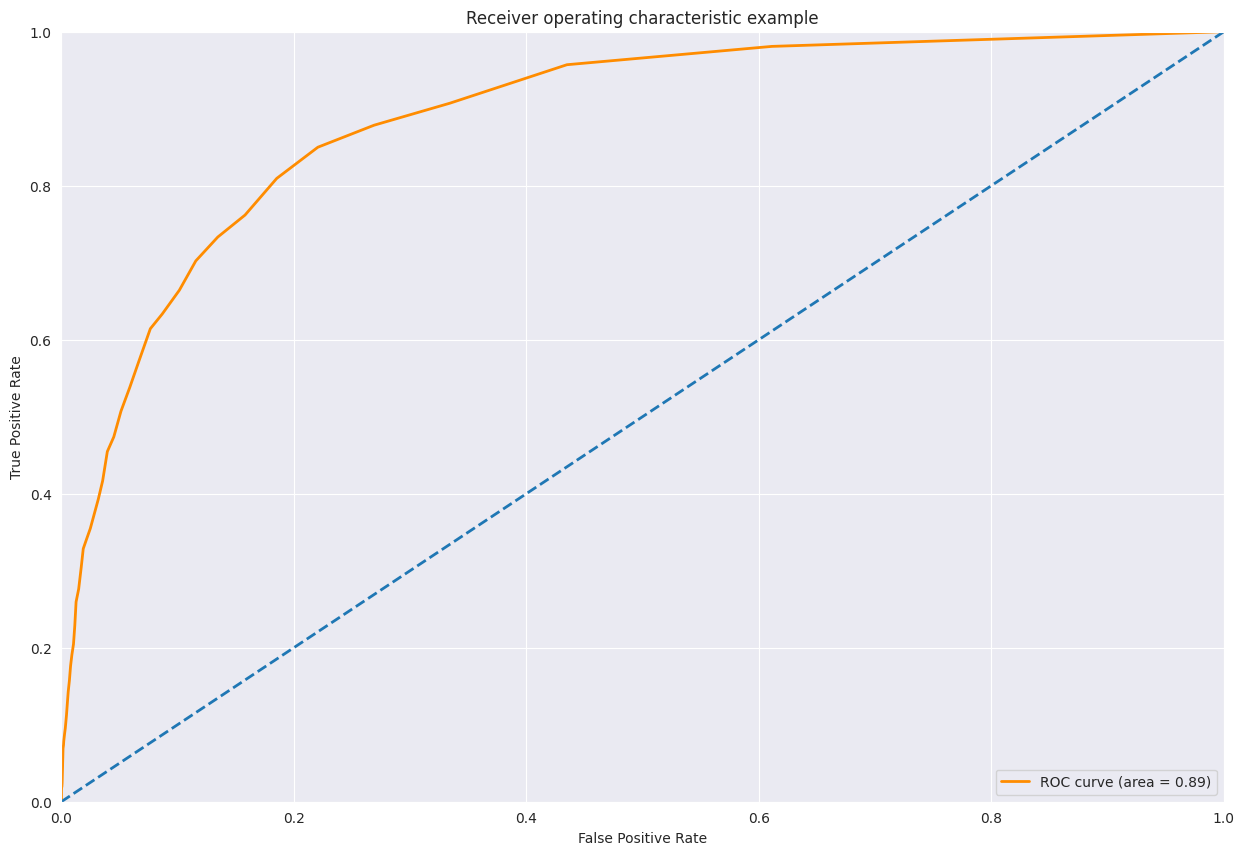

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

#roc_auc = auc(fpr, tpr)
roc_auc=roc_auc_score(y_test, y_pred)
print(roc_auc)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.31')

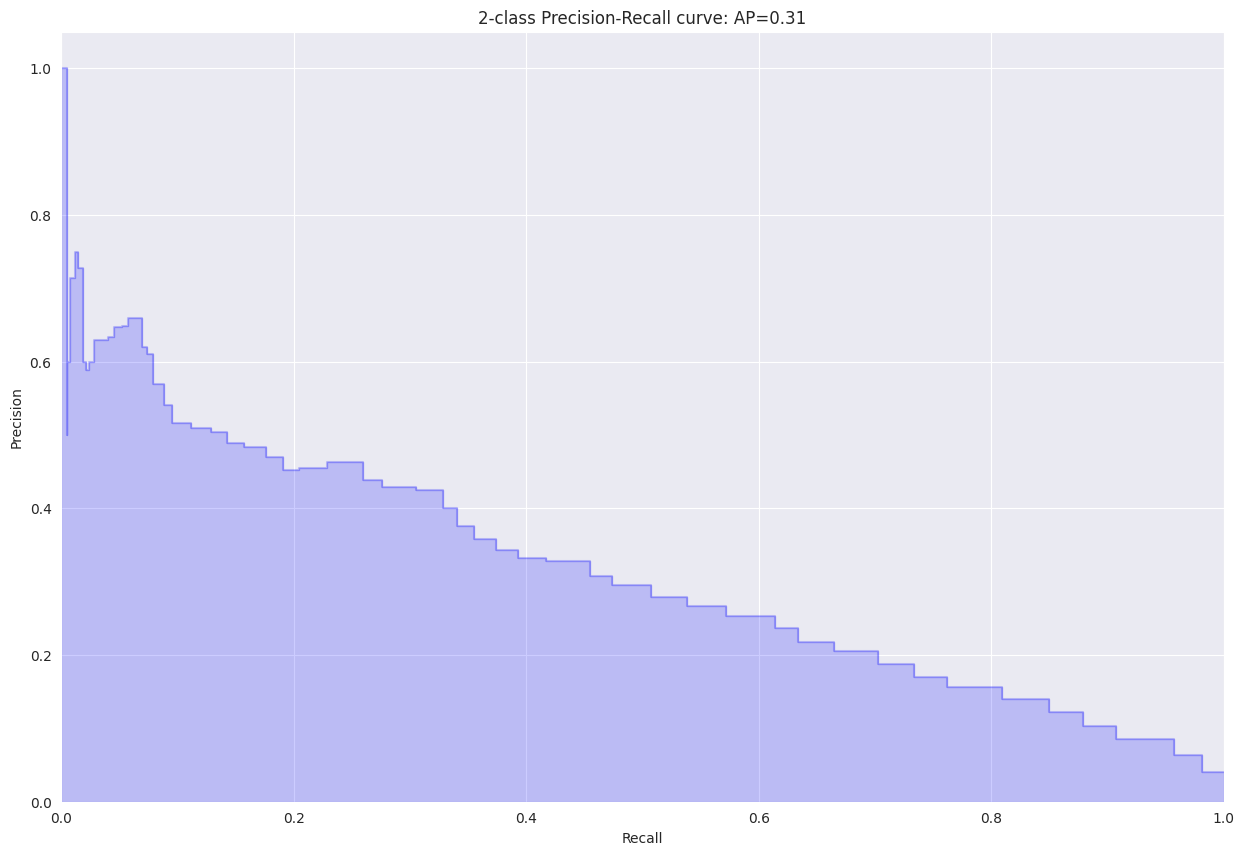

In [ ]:
# PR curve

!pip install funcsigs
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [ ]:
# train a random forest classifier
rf2 = RandomForestClassifier(n_estimators = 95, random_state = 32)
rf2.fit(X_train, y_train)

# show features
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf2.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
3             compound    0.041913
6     doc2vec_vector_0    0.026088
2                  pos    0.025373
0                  neg    0.020623
10    doc2vec_vector_4    0.017335
4             nb_chars    0.017214
8     doc2vec_vector_2    0.017210
9     doc2vec_vector_3    0.016910
7     doc2vec_vector_1    0.016656
1                  neu    0.014876
5             nb_words    0.013648
2239      word_nothing    0.010008
2853         word_room    0.009516
950         word_dirty    0.009476
285           word_bad    0.008586
3202        word_staff    0.006753
1945     word_location    0.006711
1639        word_hotel    0.006690
2867         word_rude    0.006685
3216         word_star    0.006305

0.8885177699174667


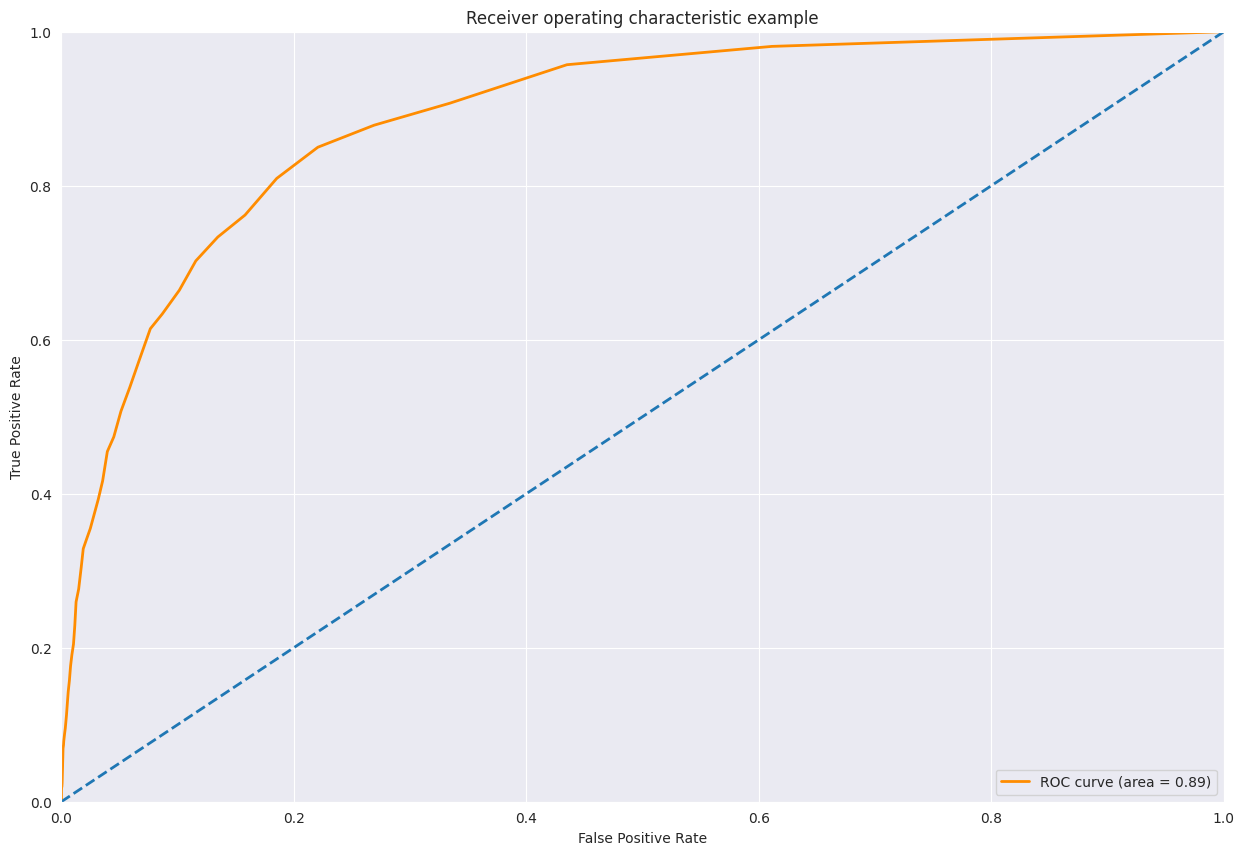

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

#roc_auc = auc(fpr, tpr)
roc_auc=roc_auc_score(y_test, y_pred)
print(roc_auc)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.31')

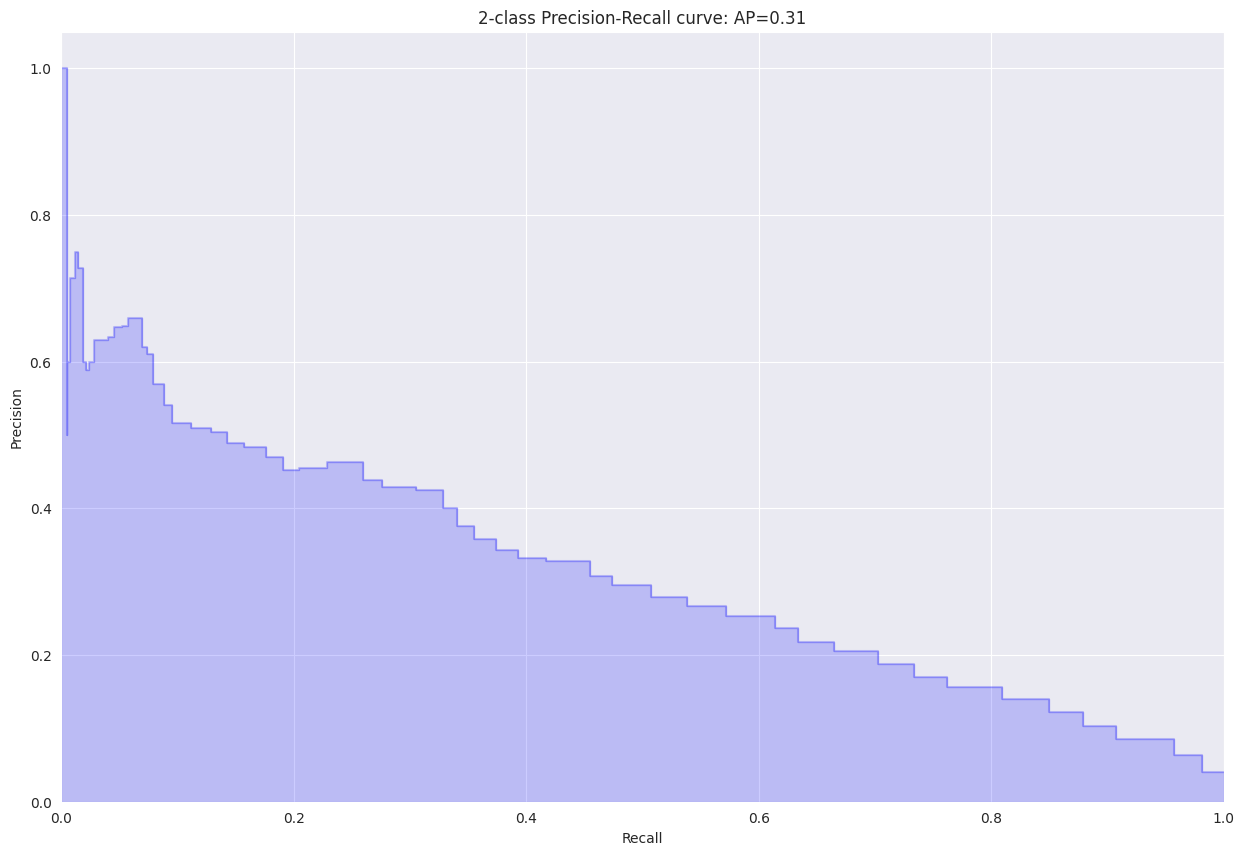

In [ ]:
# PR curve

!pip install funcsigs
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 35)
rf.fit(X_train, y_train)

# show features
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
3             compound    0.037088
2                  pos    0.026146
6     doc2vec_vector_0    0.023698
0                  neg    0.022403
10    doc2vec_vector_4    0.018227
8     doc2vec_vector_2    0.017860
7     doc2vec_vector_1    0.017046
9     doc2vec_vector_3    0.016481
4             nb_chars    0.015948
1                  neu    0.015073
5             nb_words    0.013841
2239      word_nothing    0.009426
950         word_dirty    0.009307
2853         word_room    0.009120
285           word_bad    0.008213
3216         word_star    0.007009
2867         word_rude    0.006938
3202        word_staff    0.006715
1639        word_hotel    0.006599
1945     word_location    0.006506

0.8764152169205227


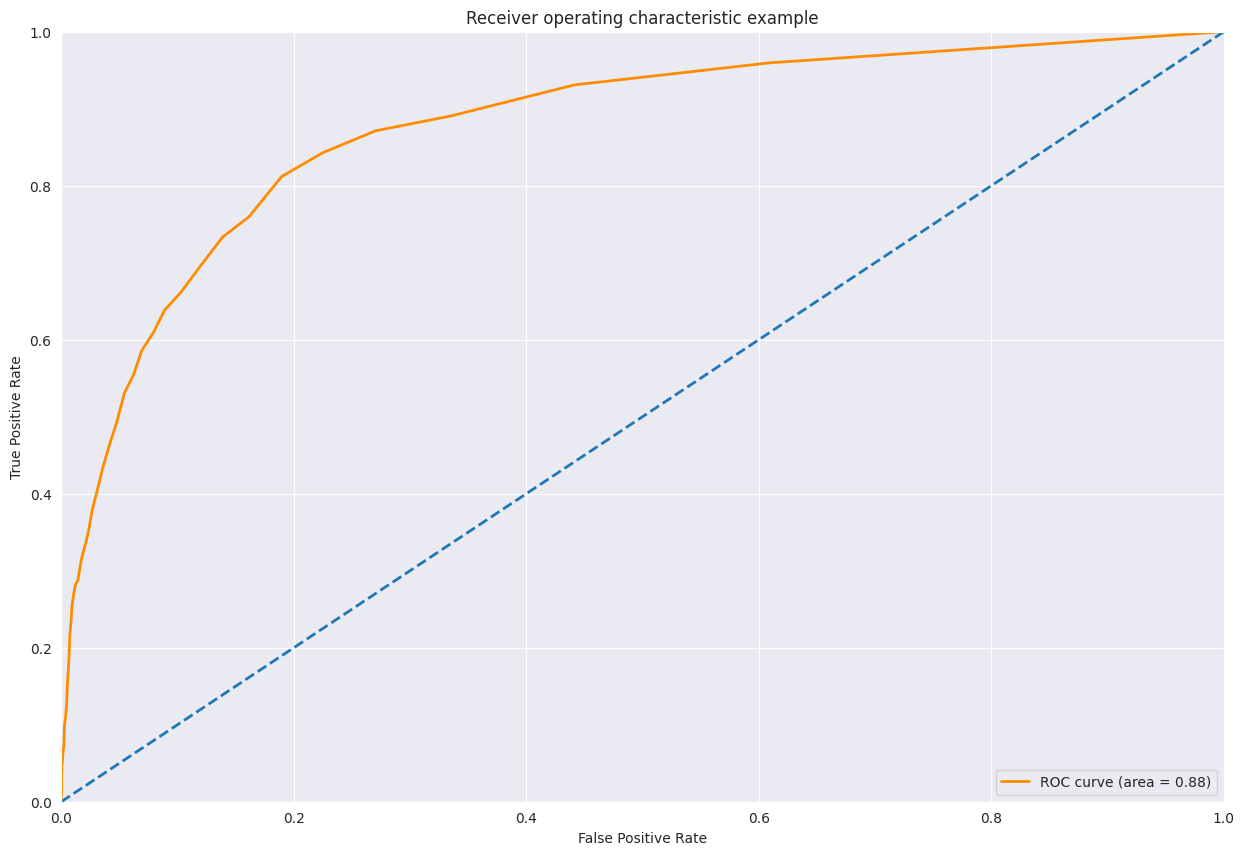

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

#roc_auc = auc(fpr, tpr)
roc_auc=roc_auc_score(y_test, y_pred)
print(roc_auc)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.33')

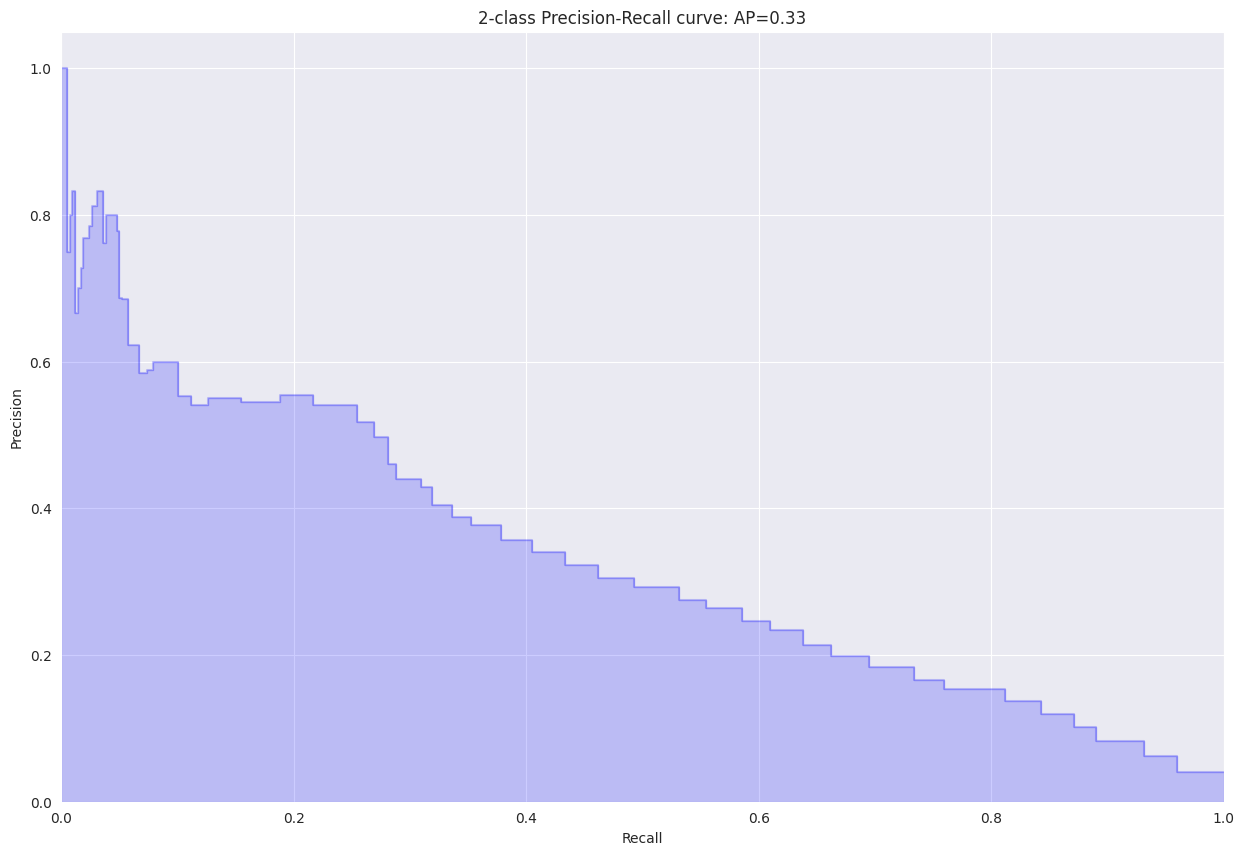

In [ ]:
# PR curve

!pip install funcsigs
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [ ]:
rf = RandomForestClassifier(n_estimators = 95, random_state = 34)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
3             compound    0.039687
2                  pos    0.024262
6     doc2vec_vector_0    0.023858
0                  neg    0.021391
10    doc2vec_vector_4    0.018206
8     doc2vec_vector_2    0.017282
4             nb_chars    0.016541
9     doc2vec_vector_3    0.016397
7     doc2vec_vector_1    0.016108
1                  neu    0.015173
5             nb_words    0.014298
2239      word_nothing    0.009813
2853         word_room    0.009474
285           word_bad    0.009434
950         word_dirty    0.009066
3216         word_star    0.007433
3202        word_staff    0.006794
1639        word_hotel    0.006562
1945     word_location    0.006462
2867         word_rude    0.006428

0.8871113356914266


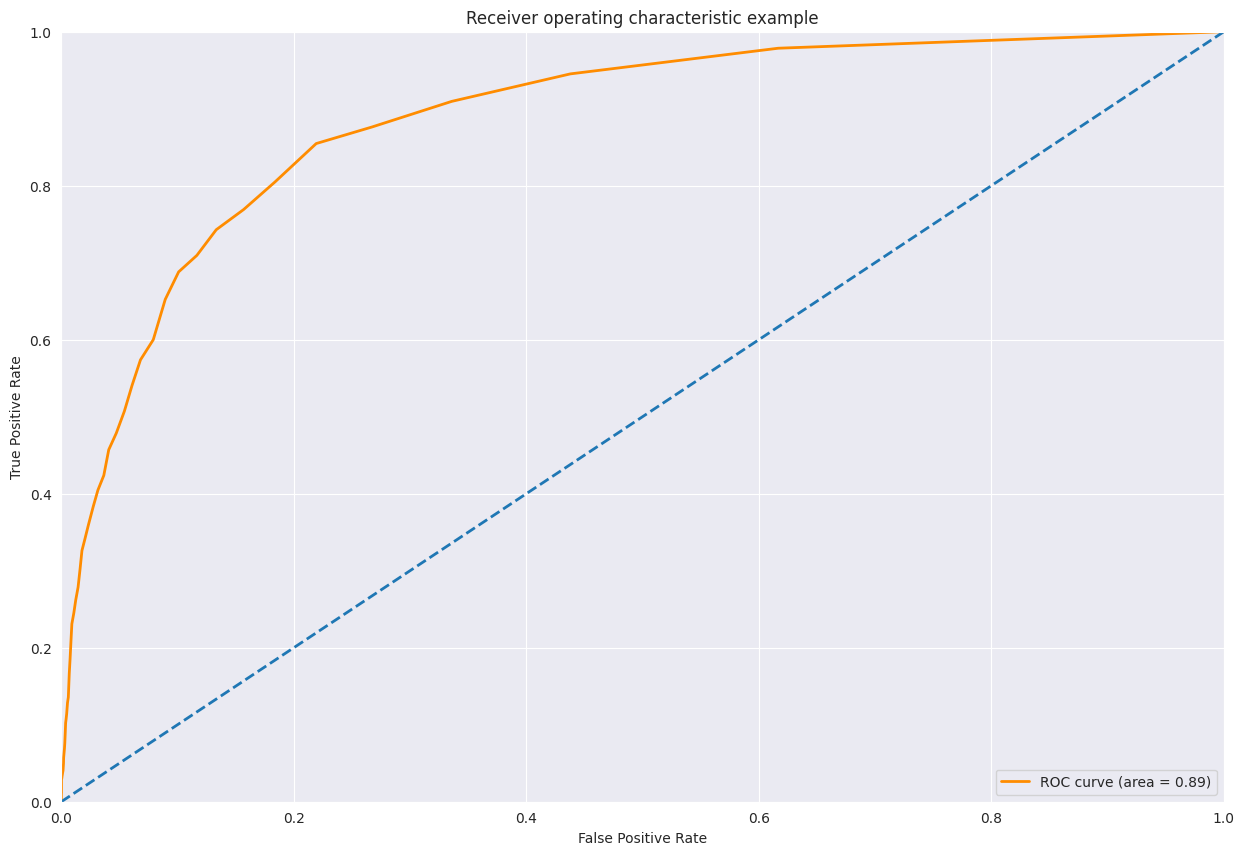

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

#roc_auc = auc(fpr, tpr)
roc_auc=roc_auc_score(y_test, y_pred)
print(roc_auc)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.32')

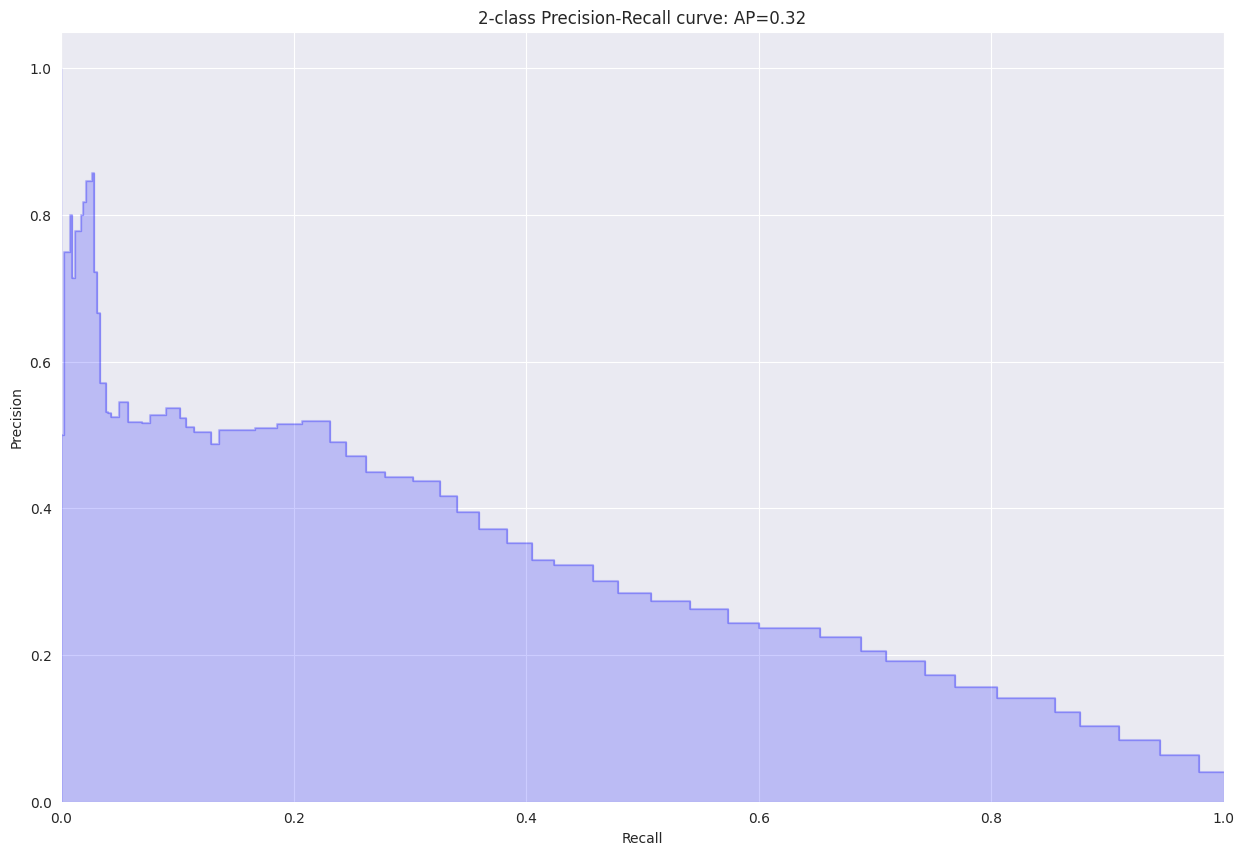

In [ ]:
# PR curve

!pip install funcsigs
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 36)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
3             compound    0.041807
6     doc2vec_vector_0    0.024787
2                  pos    0.023243
0                  neg    0.022714
8     doc2vec_vector_2    0.017764
10    doc2vec_vector_4    0.017077
7     doc2vec_vector_1    0.016515
9     doc2vec_vector_3    0.016257
4             nb_chars    0.016125
1                  neu    0.015041
5             nb_words    0.014545
2853         word_room    0.009649
2239      word_nothing    0.009292
285           word_bad    0.009082
950         word_dirty    0.008194
3216         word_star    0.007440
3202        word_staff    0.006875
1945     word_location    0.006850
2867         word_rude    0.006431
1639        word_hotel    0.006412

0.8845389686951083


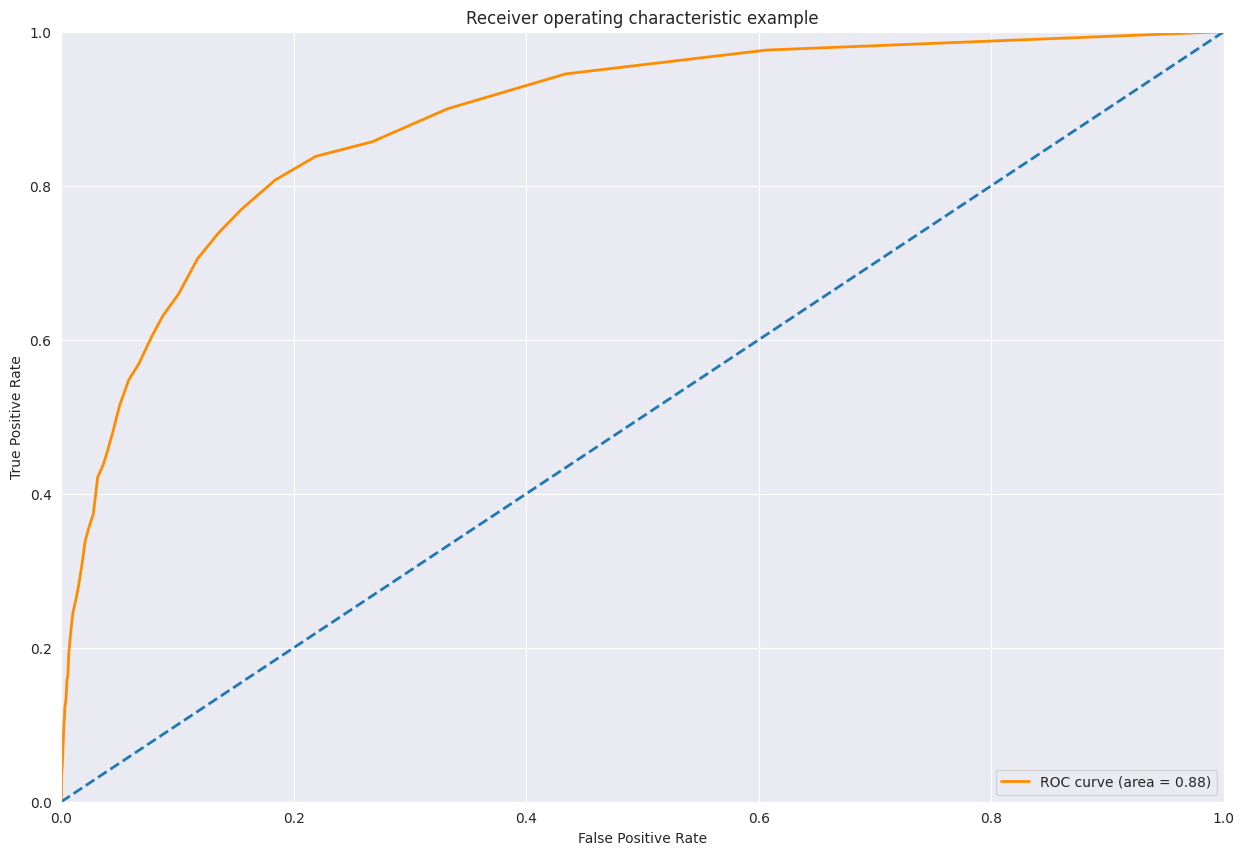

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

#roc_auc = auc(fpr, tpr)
roc_auc=roc_auc_score(y_test, y_pred)
print(roc_auc)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.34')

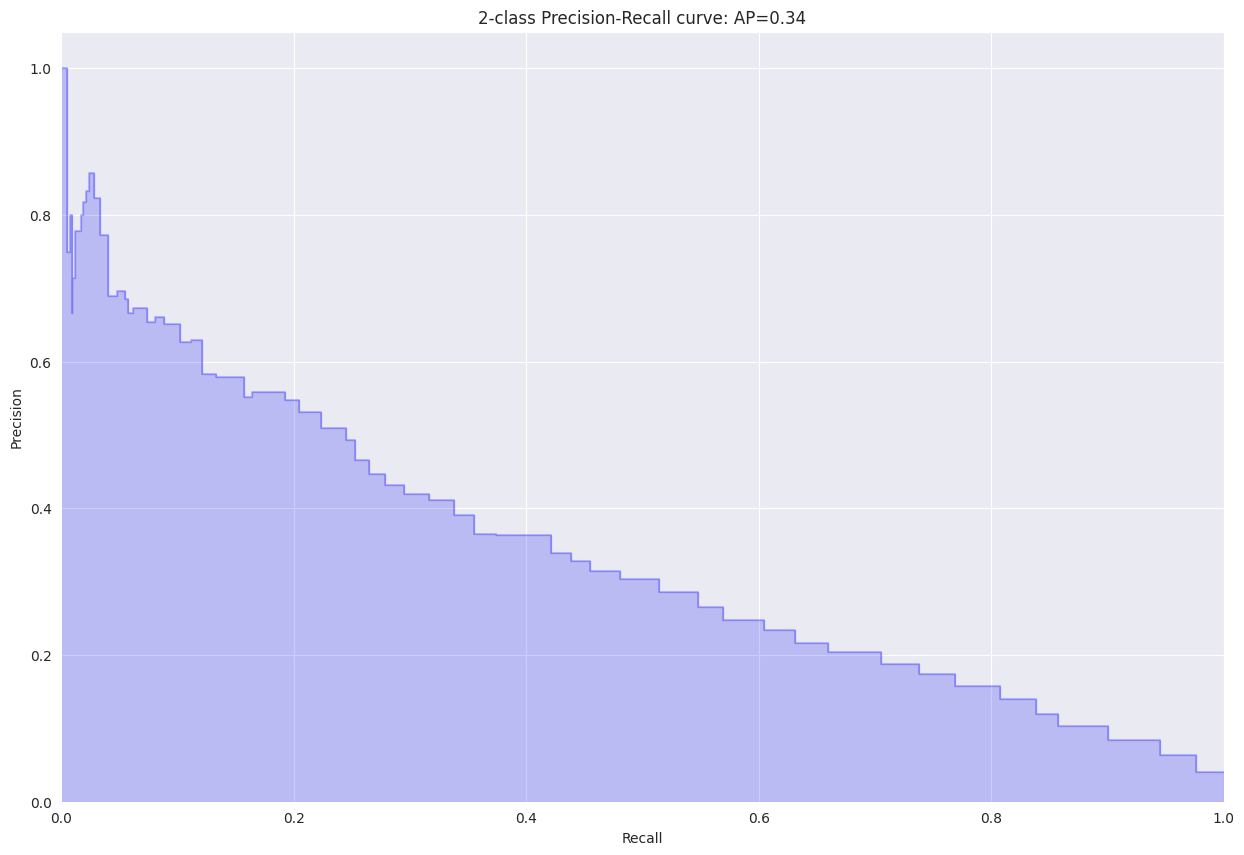

In [ ]:
# PR curve

!pip install funcsigs
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 38)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
3             compound    0.043561
2                  pos    0.024967
6     doc2vec_vector_0    0.023665
0                  neg    0.021028
10    doc2vec_vector_4    0.018129
7     doc2vec_vector_1    0.017487
4             nb_chars    0.017258
8     doc2vec_vector_2    0.017210
9     doc2vec_vector_3    0.015685
1                  neu    0.014839
5             nb_words    0.014070
950         word_dirty    0.010613
2239      word_nothing    0.009484
2853         word_room    0.008937
285           word_bad    0.007788
1945     word_location    0.007029
3216         word_star    0.006994
3202        word_staff    0.006936
1639        word_hotel    0.006447
2867         word_rude    0.006144

0.8806824033302053


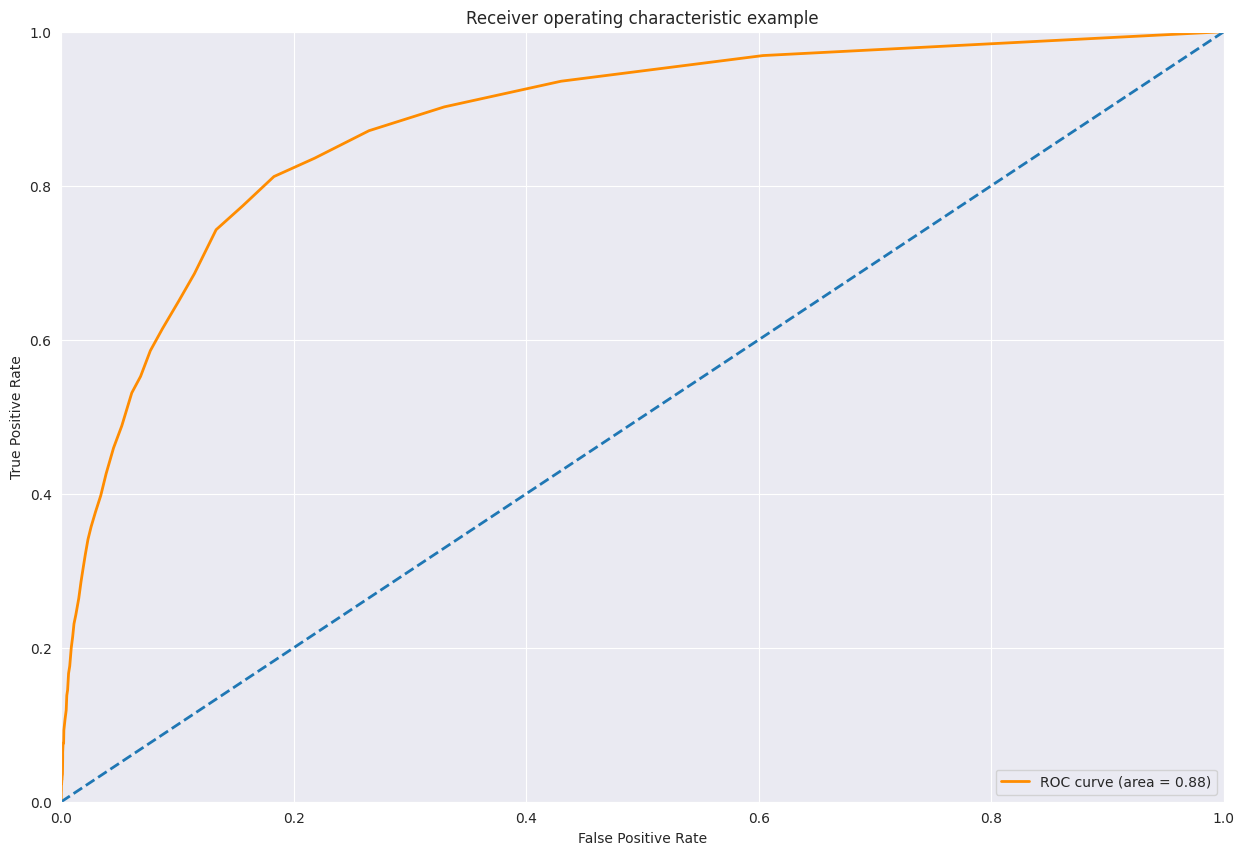

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

#roc_auc = auc(fpr, tpr)
roc_auc=roc_auc_score(y_test, y_pred)
print(roc_auc)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.32')

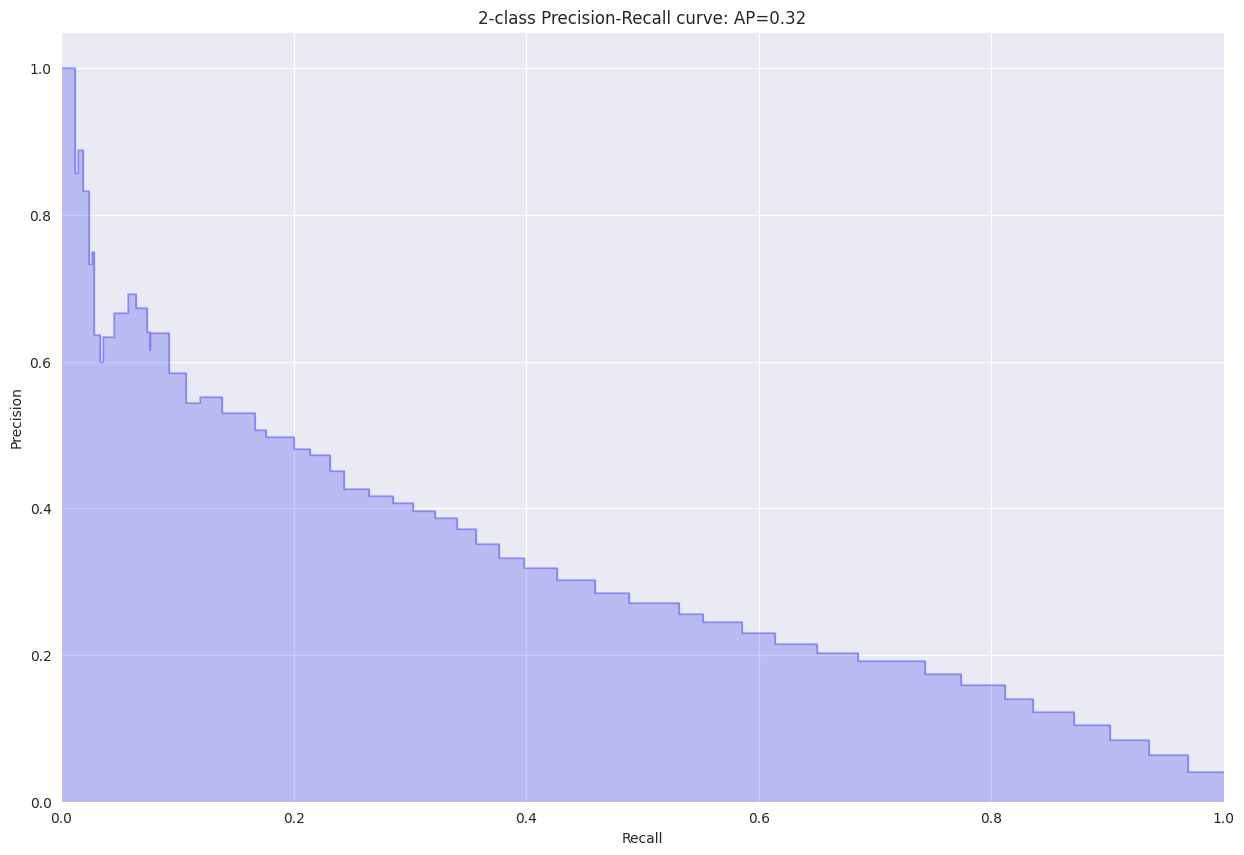

In [ ]:
# PR curve

!pip install funcsigs
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [ ]:
rf = RandomForestClassifier(n_estimators = 90, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
3             compound    0.040242
2                  pos    0.024948
6     doc2vec_vector_0    0.023025
0                  neg    0.022234
10    doc2vec_vector_4    0.018075
9     doc2vec_vector_3    0.016954
8     doc2vec_vector_2    0.016766
7     doc2vec_vector_1    0.016717
4             nb_chars    0.016020
1                  neu    0.015248
5             nb_words    0.013643
2239      word_nothing    0.009832
950         word_dirty    0.009646
285           word_bad    0.009629
2853         word_room    0.009110
3216         word_star    0.007431
1945     word_location    0.006739
3202        word_staff    0.006724
1639        word_hotel    0.006193
2867         word_rude    0.006022

0.8834825188286533


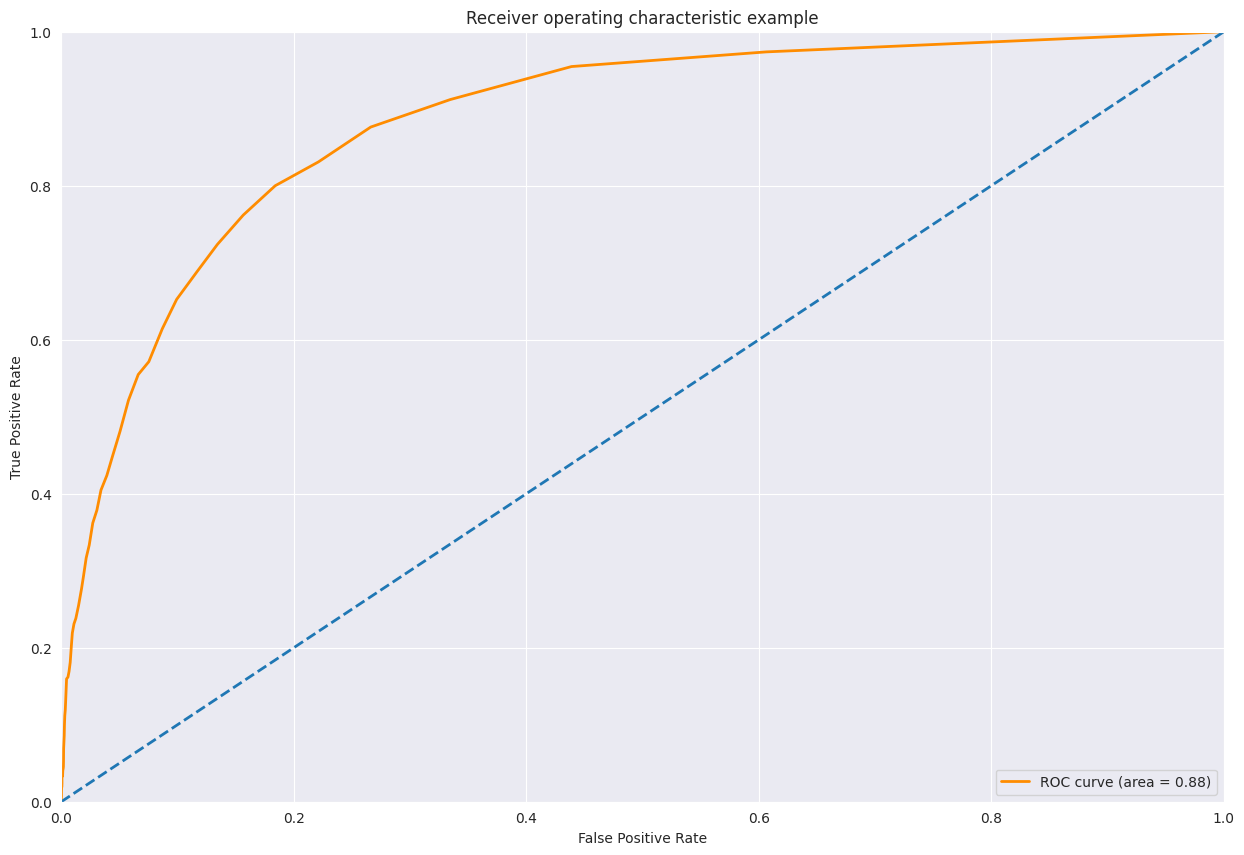

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

#roc_auc = auc(fpr, tpr)
roc_auc=roc_auc_score(y_test, y_pred)
print(roc_auc)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.31')

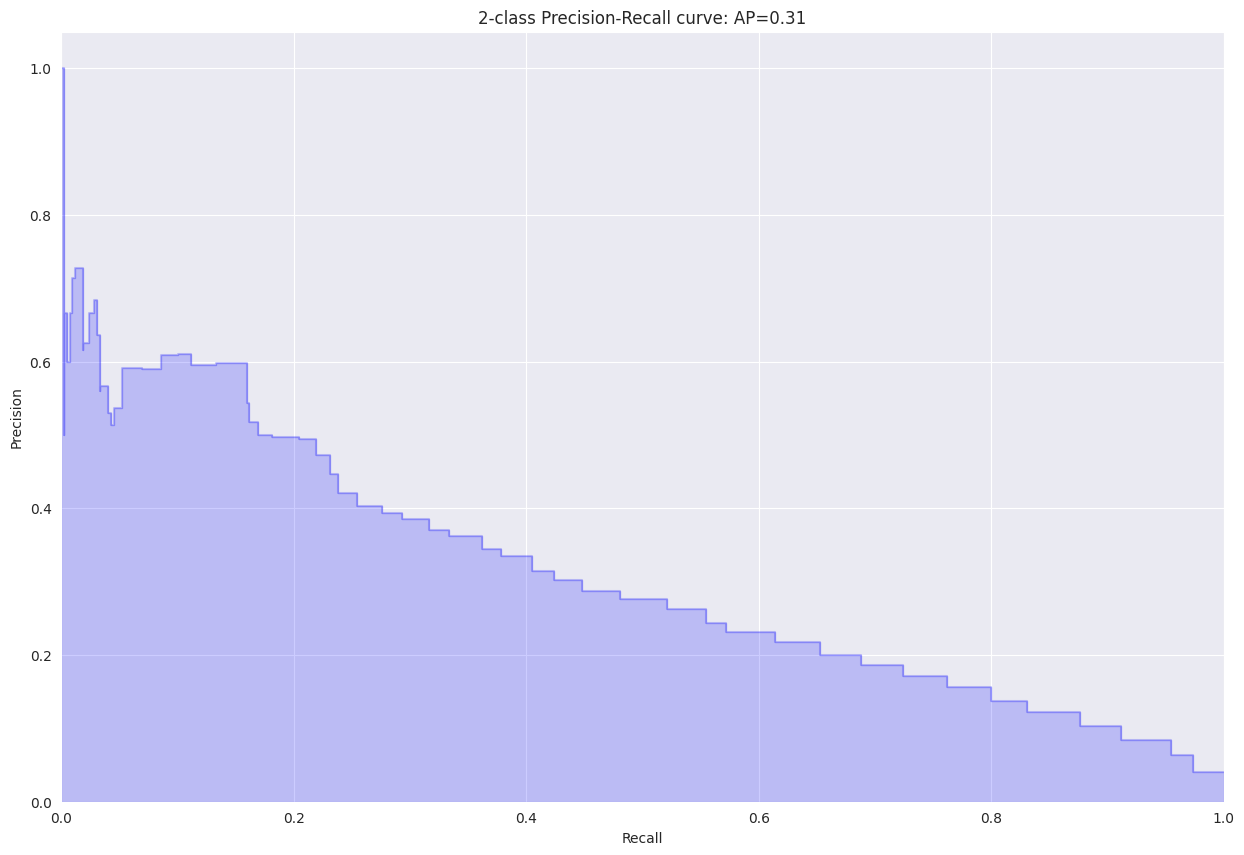

In [ ]:
# PR curve

!pip install funcsigs
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [ ]:
rf = RandomForestClassifier(n_estimators = 95, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
3             compound    0.038216
0                  neg    0.023951
6     doc2vec_vector_0    0.023545
2                  pos    0.023304
10    doc2vec_vector_4    0.018160
7     doc2vec_vector_1    0.017437
8     doc2vec_vector_2    0.017260
9     doc2vec_vector_3    0.016567
4             nb_chars    0.016281
1                  neu    0.016025
5             nb_words    0.014494
2239      word_nothing    0.009771
2853         word_room    0.009477
950         word_dirty    0.009353
285           word_bad    0.009040
3216         word_star    0.007277
3202        word_staff    0.007169
1945     word_location    0.007068
2517         word_poor    0.006555
1639        word_hotel    0.006505

0.8803997930652807


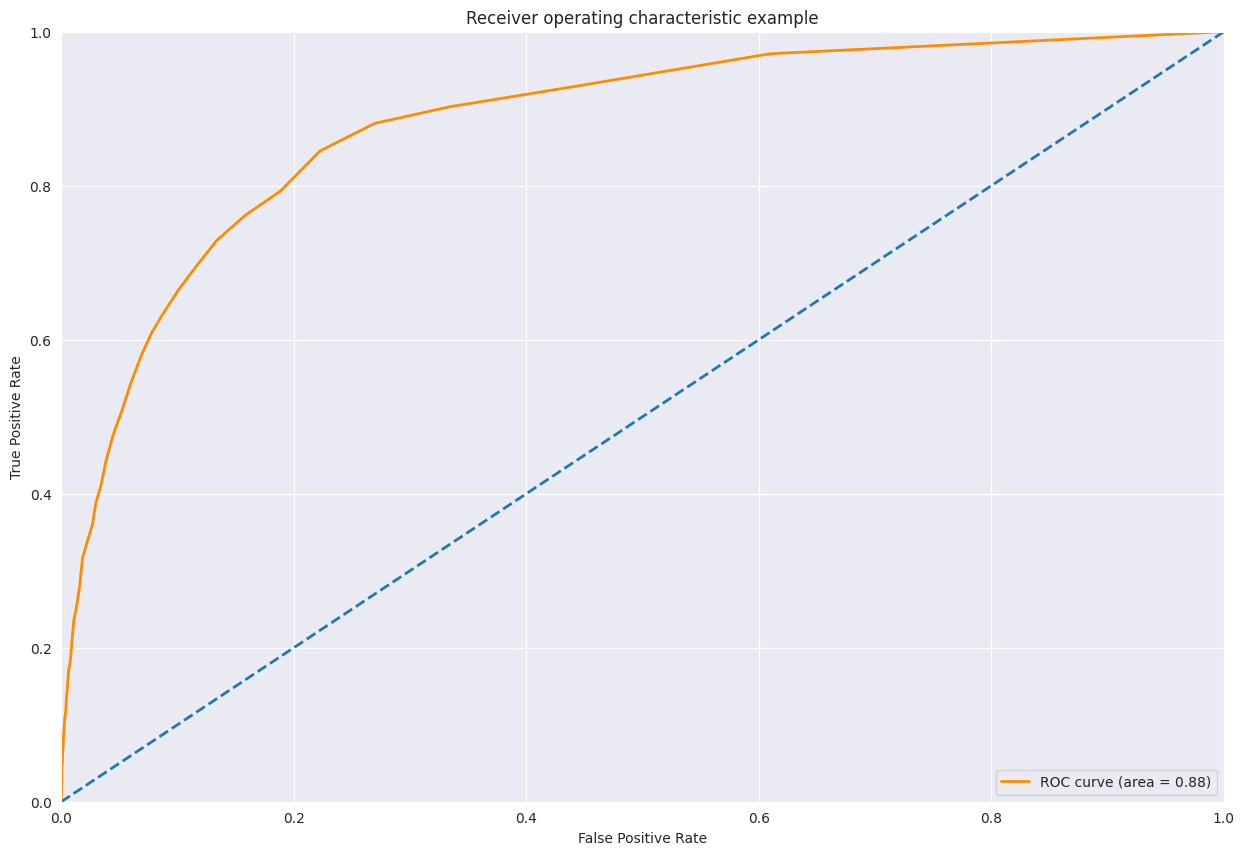

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

#roc_auc = auc(fpr, tpr)
roc_auc=roc_auc_score(y_test, y_pred)
print(roc_auc)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.32')

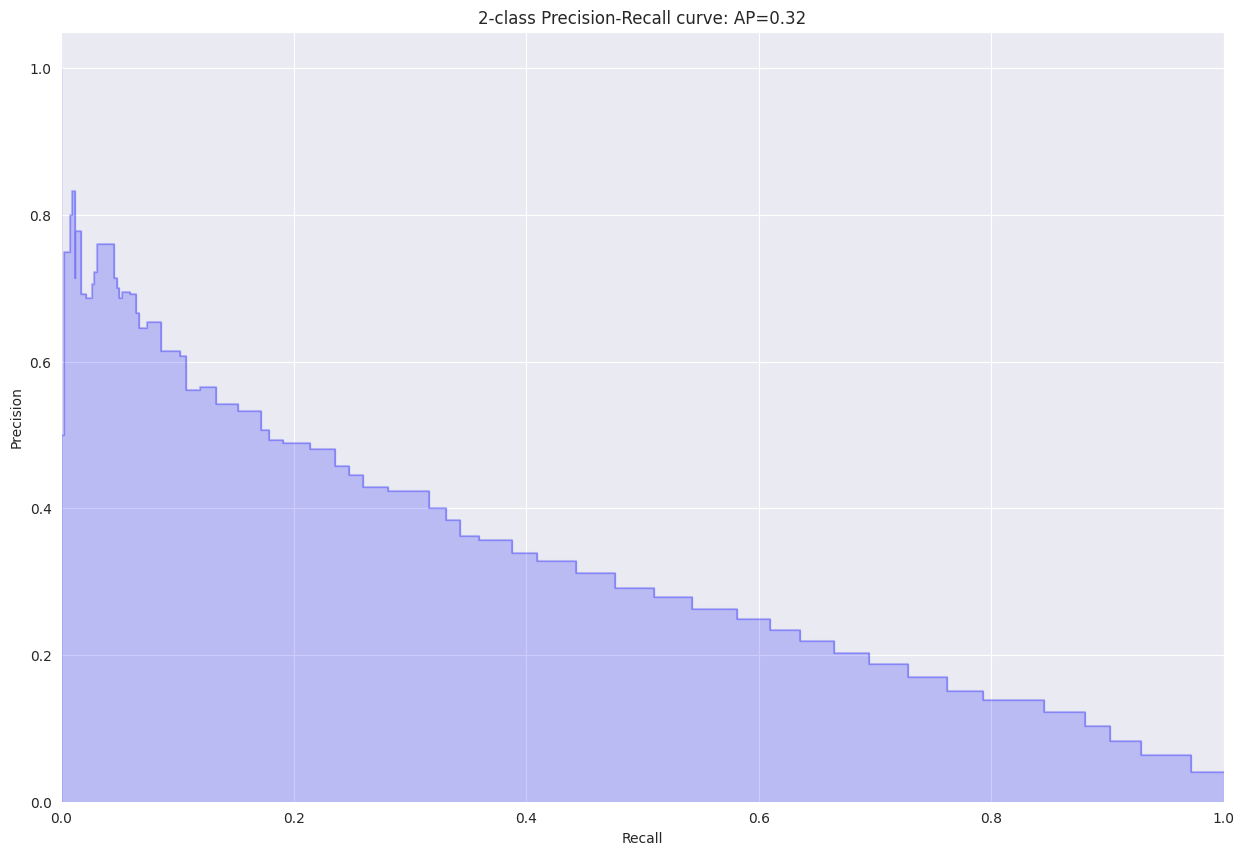

In [ ]:
# PR curve

!pip install funcsigs
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature
average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Now using transformers model

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer # for tokenizing 
from transformers import AutoModelForSequenceClassification # for classification
from scipy.special import softmax # for normalizing the output

In [ ]:
# Compile Pre-Trained Model
MODEL = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
dataframe_subset = dataframe.head(1000)

In [ ]:
example = dataframe_subset.Negative_Review.iloc[50]
example

' The bar was shut when I got back at midnight which seemed quite early for a hotel bar on a Saturday night in a city like Amsterdam '

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))


In [ ]:
# Encoding the  text
encoded_text = tokenizer(example, return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,    20,  2003,    21,  2572,    77,    38,   300,   124,    23,
          5832,    61,  2551,  1341,   419,    13,    10,  2303,  2003,    15,
            10,   378,   363,    11,    10,   343,   101, 16342,  1437,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]])}

In [ ]:
# Run the model
ex_score_roberta = model(**encoded_text)
ex_score_roberta

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.0201,  0.8815, -0.9159]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
# Applying softmax
ex_score_roberta = ex_score_roberta[0][0].detach().numpy()
ex_score_roberta = softmax(ex_score_roberta)
ex_score_roberta = {
    'roberta_neg': ex_score_roberta[0],
    'roberta_neu': ex_score_roberta[1],
    'roberta_pos': ex_score_roberta[2],
}
ex_score_roberta

{'roberta_neg': 0.2660498,
 'roberta_neu': 0.62960106,
 'roberta_pos': 0.10434919}

In [ ]:
ex_token = nltk.word_tokenize(example)
np.array(ex_token)

array(['The', 'bar', 'was', 'shut', 'when', 'I', 'got', 'back', 'at',
       'midnight', 'which', 'seemed', 'quite', 'early', 'for', 'a',
       'hotel', 'bar', 'on', 'a', 'Saturday', 'night', 'in', 'a', 'city',
       'like', 'Amsterdam'], dtype='<U9')

In [ ]:
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))
filtered_sentence = [word for word in ex_token if not word.lower() in stop_words]
filtered_sentence

['bar',
 'shut',
 'got',
 'back',
 'midnight',
 'seemed',
 'quite',
 'early',
 'hotel',
 'bar',
 'Saturday',
 'night',
 'city',
 'like',
 'Amsterdam']

In [ ]:
ex_tagged = nltk.pos_tag(ex_token)
ex_tagged

[('The', 'DT'),
 ('bar', 'NN'),
 ('was', 'VBD'),
 ('shut', 'VBN'),
 ('when', 'WRB'),
 ('I', 'PRP'),
 ('got', 'VBD'),
 ('back', 'RB'),
 ('at', 'IN'),
 ('midnight', 'NN'),
 ('which', 'WDT'),
 ('seemed', 'VBD'),
 ('quite', 'RB'),
 ('early', 'JJ'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('hotel', 'NN'),
 ('bar', 'NN'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('Saturday', 'NNP'),
 ('night', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('city', 'NN'),
 ('like', 'IN'),
 ('Amsterdam', 'NNP')]

In [ ]:
import nltk
nltk.download('maxent_ne_chunker')
import nltk
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
ex_chunked = nltk.chunk.ne_chunk(ex_tagged)
ex_chunked.pprint()


(S
  The/DT
  bar/NN
  was/VBD
  shut/VBN
  when/WRB
  I/PRP
  got/VBD
  back/RB
  at/IN
  midnight/NN
  which/WDT
  seemed/VBD
  quite/RB
  early/JJ
  for/IN
  a/DT
  hotel/NN
  bar/NN
  on/IN
  a/DT
  Saturday/NNP
  night/NN
  in/IN
  a/DT
  city/NN
  like/IN
  (PERSON Amsterdam/NNP))


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [ ]:
print(example)
ex_score = sia.polarity_scores(example)
ex_score

 The bar was shut when I got back at midnight which seemed quite early for a hotel bar on a Saturday night in a city like Amsterdam 


{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.3612}

In [ ]:
# Get scores for entire dataset
from tqdm.notebook import tqdm # for a beautiful progress bar

result_score = {}
for i, row in tqdm(dataframe_subset.iterrows(), total=len(dataframe_subset)):
    result_score[i] = sia.polarity_scores(row['Negative_Review'])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(result_score).T
vaders.head()

neg    neu    pos  compound
0  0.086  0.868  0.046   -0.9418
1  1.000  0.000  0.000   -0.7096
2  0.183  0.775  0.042   -0.7469
3  0.116  0.795  0.089   -0.7181
4  0.062  0.899  0.039   -0.4772

In [ ]:
print(example)
print('Score by VADER:', ex_score)
print('Score by Roberta:', ex_score_roberta )

 The bar was shut when I got back at midnight which seemed quite early for a hotel bar on a Saturday night in a city like Amsterdam 
Score by VADER: {'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.3612}
Score by Roberta: {'roberta_neg': 0.2660498, 'roberta_neu': 0.62960106, 'roberta_pos': 0.10434919}


In [ ]:
df_vader = dataframe_subset.merge(vaders, how='left', left_index=True, right_index=True)
df_vader.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7               0   
1                                           7               0   
2                                           9               0   
3                                           1               0   
4                                           3               0   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng     Hotel_City_Country    neg    neu    pos  compound  
0  52.360576  4.915968  Amsterdam Netherlands  0.086  0.868  0.046   -0.9418  
1  52.360576  4.915968  Amsterdam Netherlands  1.000  0.000  0.000   -0.7096  
2  52.360576  4.915968  Amsterdam Netherlands  0.183  0.775  0.042   -0.7469  
3  52.360576  4.915968  Amsterdam Netherlands  0.116  0.795  0.089   -0.7181  
4  52.360576  4.915968  Amsterdam Netherlands  0.062  0.899  0.039   -0.4772

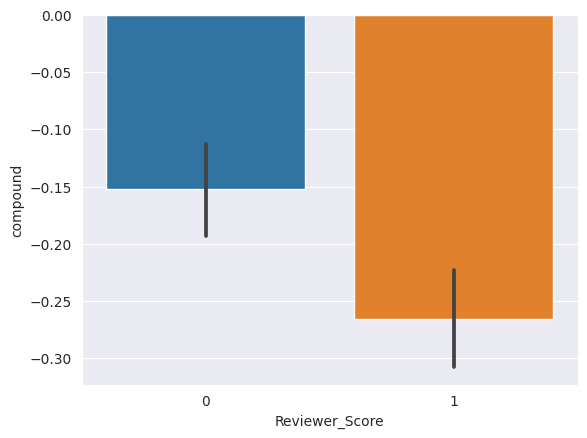

In [ ]:
sns.barplot(data=df_vader, x='Reviewer_Score', y='compound', label='Compound score by Review Score')
plt.show()

In [ ]:
def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    score = model(**encoded_text)
    score = score[0][0].detach().numpy()
    score = softmax(score)
    score = {
        'roberta_neg': score[0],
        'roberta_neu': score[1],
        'roberta_pos': score[2],
    }
    return score

In [ ]:
result_score = {}
for i, row in tqdm(dataframe_subset.iterrows(), total=len(dataframe_subset)):
    try:
        # VADERscore
        vader_score = sia.polarity_scores(row['Negative_Review'])
        new_vader_score = {}
        for key, value in vader_score.items():
            new_vader_score[f"vader_{key}"] = value
        # Robertascore
        roberta_score = polarity_scores_roberta(row['Negative_Review'])
        combine_score = {**new_vader_score, **roberta_score}
        result_score[i] = combine_score
    except:
        print(f"Broke for Id {i} - can't be handled by Roberta")

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print (result_score)

{0: {'vader_neg': 0.086, 'vader_neu': 0.868, 'vader_pos': 0.046, 'vader_compound': -0.9418, 'roberta_neg': 0.52670157, 'roberta_neu': 0.39292002, 'roberta_pos': 0.080378465}, 1: {'vader_neg': 1.0, 'vader_neu': 0.0, 'vader_pos': 0.0, 'vader_compound': -0.7096, 'roberta_neg': 0.21373115, 'roberta_neu': 0.68436694, 'roberta_pos': 0.10190183}, 2: {'vader_neg': 0.183, 'vader_neu': 0.775, 'vader_pos': 0.042, 'vader_compound': -0.7469, 'roberta_neg': 0.36987233, 'roberta_neu': 0.48324037, 'roberta_pos': 0.14688729}, 3: {'vader_neg': 0.116, 'vader_neu': 0.795, 'vader_pos': 0.089, 'vader_compound': -0.7181, 'roberta_neg': 0.8773587, 'roberta_neu': 0.11280862, 'roberta_pos': 0.009832634}, 4: {'vader_neg': 0.062, 'vader_neu': 0.899, 'vader_pos': 0.039, 'vader_compound': -0.4772, 'roberta_neg': 0.90956765, 'roberta_neu': 0.08221952, 'roberta_pos': 0.008212817}, 5: {'vader_neg': 0.172, 'vader_neu': 0.828, 'vader_pos': 0.0, 'vader_compound': -0.3612, 'roberta_neg': 0.8831428, 'roberta_neu': 0.108328

In [ ]:
result_df = pd.DataFrame(result_score).T
final_df = dataframe_subset.merge(result_df, how='left', left_index=True, right_index=True)
final_df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7               0   
1                                           7               0   
2                                           9               0   
3                                           1               0   
4                                           3               0   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng     Hotel_City_Country  vader_neg  vader_neu  \
0  52.360576  4.915968  Amsterdam Netherlands      0.086      0.868   
1  52.360576  4.915968  Amsterdam Netherlands      1.000      0.000   
2  52.360576  4.915968  Amsterdam Netherlands      0.183      0.775   
3  52.360576  4.915968  Amsterdam Netherlands      0.116      0.795   
4  52.360576  4.915968  Amsterdam Netherlands      0.062      0.899   

   vader_pos  vader_compound  roberta_neg  roberta_neu  roberta_pos  
0      0.046         -0.9418     0.526702     0.392920     0.080378  
1      0.000         -0.7096     0.213731     0.684367     0.101902  
2      0.042         -0.7469     0.369872     0.483240     0.146887  
3      0.089         -0.7181     0.877359     0.112809     0.009833  
4      0.039         -0.4772     0.909568     0.082220     0.008213

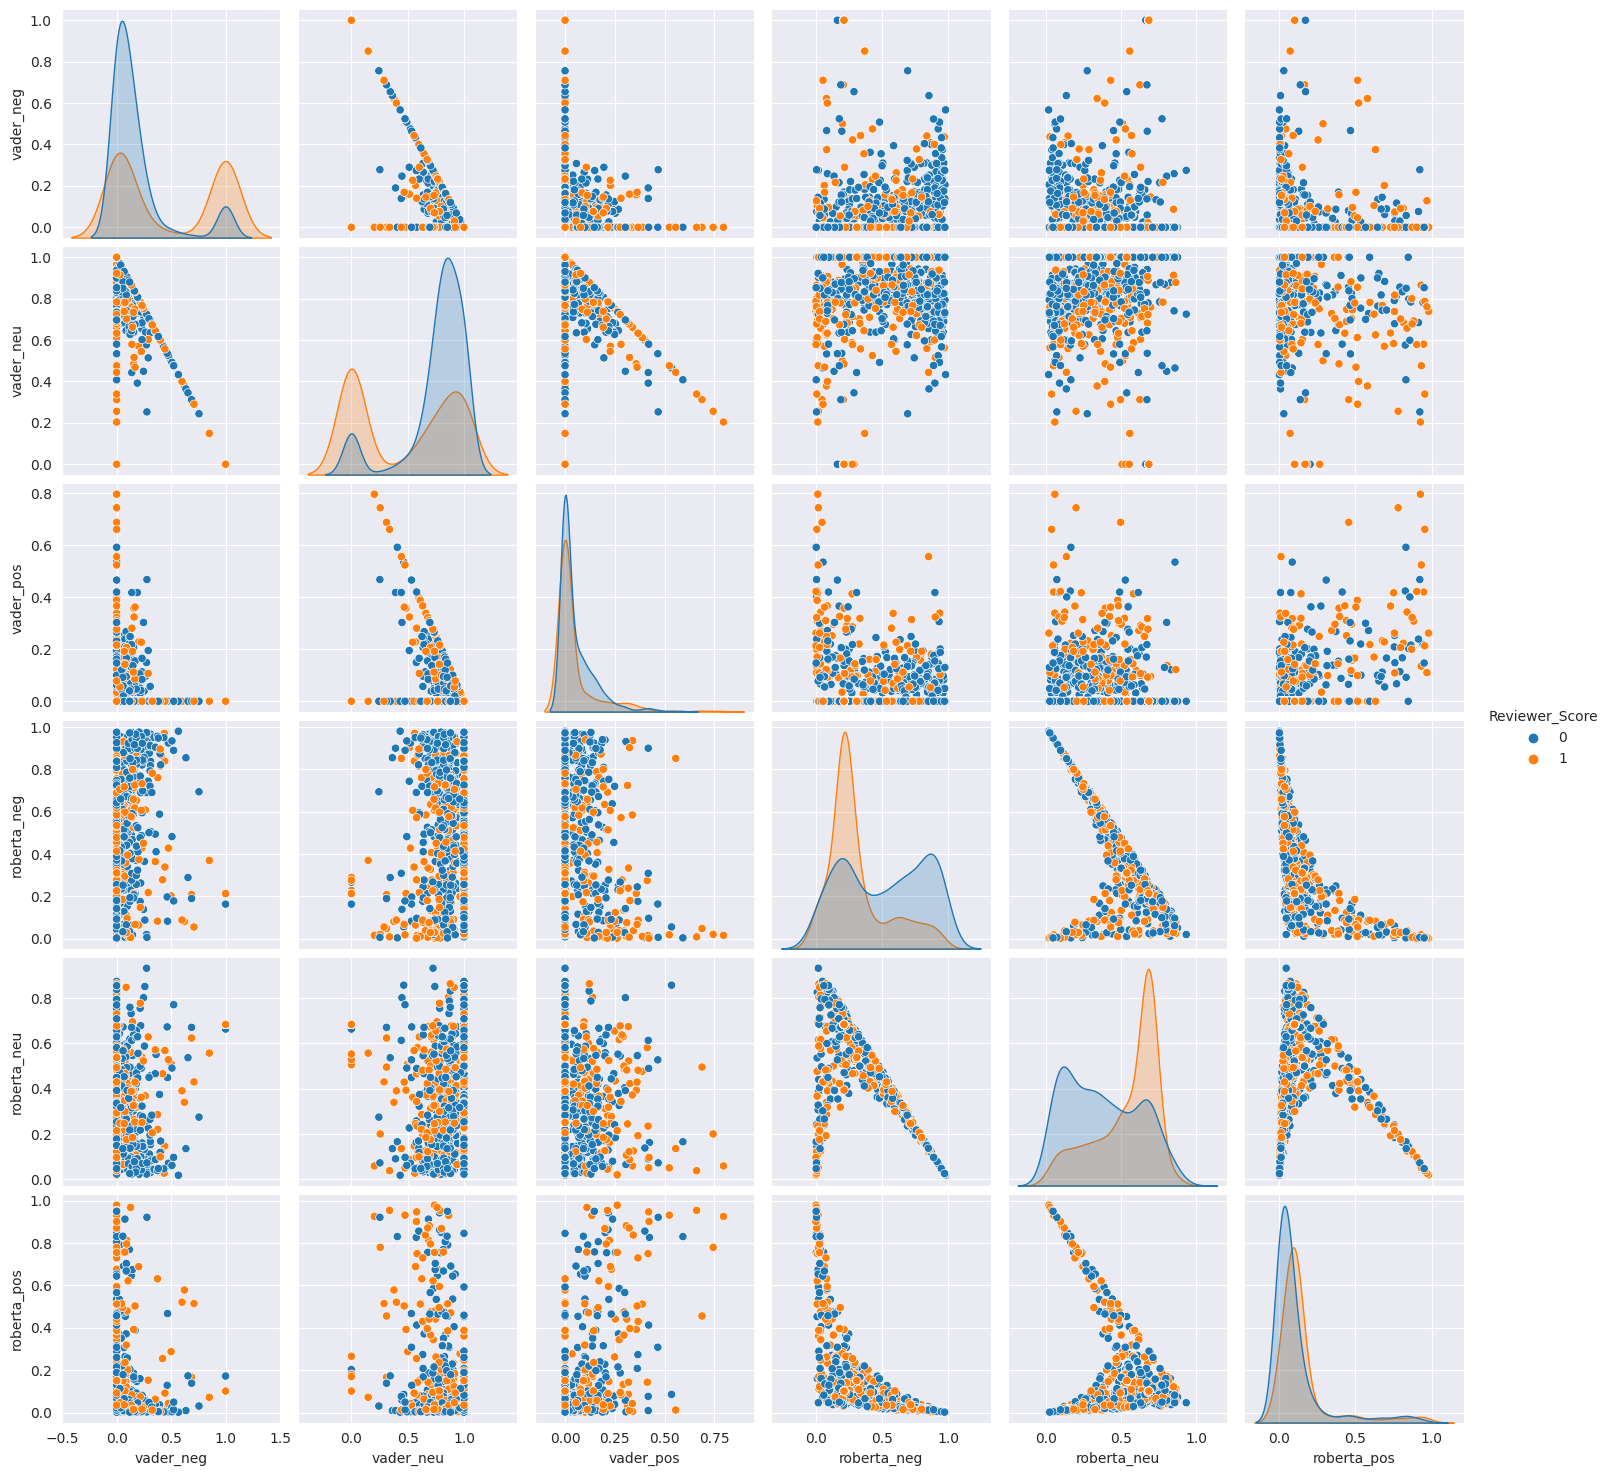

In [ ]:
sns.pairplot(data=final_df, 
            vars=['vader_neg', 'vader_neu', 'vader_pos', 
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Reviewer_Score')
plt.show()

In [ ]:
false_positives = final_df[(final_df.Reviewer_Score==1) & (final_df.roberta_pos>0.5)] \
    .sort_values('roberta_pos', ascending=False) \
    [['Reviewer_Score',"Negative_Review", 'vader_pos', 'roberta_pos']]
false_positives

Reviewer_Score                                    Negative_Review  \
7                 1   Apart from the price for the brekfast Everyth...   
611               1   Nothing could have been better This is one of...   
900               1                                      Loved it all    
504               1   Just walking in the reception could be made a...   
399               1                        It s a all round good hotel   
586               1     Nothing could have been better It was perfect    
173               1   the change over of staff at the check in too ...   
52                1                                I loved everything    
883               1                              Bedroom was very warm   
642               1   Room a little on the small side though perfec...   
824               1   It got bright early in the morning so blackou...   
438               1   Rooms could be updated that being said everyt...   
486               1   I can t think of a thing that needed improved...   
23                1   Transportation was a bit of a pain but on rou...   
911               1   During previous stays it was nice to have a g...   
723               1                                           all good   
624               1   Didn t realise we had to book car parking due...   
806               1   Would have loved to hear an English accent on...   
518               1   Nothing really A lower price is always good o...   
537               1   Room was really tiny and I don t think was go...   
430               1   choice of food in bar wasn t too good but the...   
95                1   The work being done externally right now is o...   
461               1          Really nothing this was a perfect choice    
548               1   The double room we stopped in was a little sm...   
583               1    Parking was handy and safe but quite expensive    
10                1                                 Nothing all great    
678               1                              Nothing It s perfect    
979               1                                No problems at all    
646               1   The room little bit small But for couple is e...   
830               1                               Room was a bit warm    
937               1   Room touch too small but again don t complain...   

     vader_pos  roberta_pos  
7        0.262     0.978585  
611      0.110     0.968214  
900      0.661     0.954048  
504      0.213     0.954019  
399      0.420     0.947180  
586      0.524     0.931571  
173      0.135     0.930003  
52       0.796     0.925560  
883      0.422     0.901742  
642      0.308     0.881841  
824      0.322     0.871254  
438      0.200     0.868423  
486      0.343     0.837814  
23       0.223     0.813497  
911      0.207     0.795775  
723      0.744     0.779620  
624      0.109     0.757505  
806      0.262     0.755695  
518      0.417     0.750196  
537      0.366     0.729984  
430      0.228     0.688993  
95       0.233     0.676467  
461      0.000     0.631398  
548      0.170     0.621854  
583      0.218     0.594921  
10       0.000     0.578575  
678      0.000     0.521114  
979      0.000     0.514568  
646      0.099     0.513607  
830      0.388     0.512254  
937      0.362     0.503281

In [ ]:
for text in false_positives.Negative_Review: print(text, '\n')

 Apart from the price for the brekfast Everything very good 

 Nothing could have been better This is one of if not the best hotels I ve stayed in for it s attention to detail  

 Loved it all  

 Just walking in the reception could be made a bit more comfortable perhaps seating for more than 1 person a table for brochures Also we found that the area had many good local restaurants which could be printed on a simple map as well as grocery stores hairdresser etc These were in walking distance to the hotel and would be a great help for first time visitors  

 It s a all round good hotel 

 Nothing could have been better It was perfect  

 the change over of staff at the check in too many different faces over 3 days must of been greeted and welcomed by 8 different members of staff just at the reception desk that the rooms were not depicted on the site as they were when we arrived the room was stunning but would of liked to have seen that when booking 

 I loved everything  

 Bedroom was 

In [ ]:
false_negatives = final_df[(final_df.	Reviewer_Score==0) & (final_df.roberta_neg>0.5)] \
    .sort_values('roberta_neg', ascending=False) \
    [['Reviewer_Score','Positive_Review','vader_neg', 'roberta_neg']]
false_negatives


Reviewer_Score                                    Positive_Review  \
710               0                                        No Positive   
610               0         The breakfast buffet had a good selection    
873               0          Comfortable room friendly reception staff   
620               0               Location and the staff were friendly   
608               0                                        No Positive   
..              ...                                                ...   
323               0   Nice room located on two floors for a fair price   
769               0                    Buffet breakfast was very good    
46                0                                        Massive bed   
190               0   Staff was vey pleasant The place is very well...   
942               0   The location was good for what we were there ...   

     vader_neg  roberta_neg  
710      0.567     0.980617  
610      0.206     0.976337  
873      0.000     0.975964  
620      0.138     0.975121  
608      0.275     0.974193  
..         ...          ...  
323      0.000     0.508021  
769      0.310     0.507027  
46       0.042     0.504843  
190      0.105     0.504374  
942      0.297     0.501251  

[287 rows x 4 columns]

In [ ]:
for text in false_negatives.Positive_Review: print(text, '\n')

No Positive 

 The breakfast buffet had a good selection  

 Comfortable room friendly reception staff 

 Location and the staff were friendly 

No Positive 

 Staff were courteous and helpful 

 Easy to reach Covent Garden Soho and City However the hotel is quite far away from Westminster Room is clean comfy and nicely designed Very nice couch good bath 

 Great location and parking Delivered wine to celebrate my wife birthday thankyou 

 The place looked amazing and it was close enough to everything that walking was not a hassle 

 The breakfast was the only positive element of this hotel original in taste and a good selection of selection of health food dishes on the buffet We did not try the restaurant but the whole set up with its view and terrace on the park is exceptional We had a wedding in the hotel s chapel so the convenience of just walking upstairs after the party was our reason of selecting this location  

 The room was spacious and the beds comfortable 

 The only good t

In [ ]:
True_positives = final_df[(final_df.Reviewer_Score==1) & (final_df.roberta_pos>0.5)] \
    .sort_values('roberta_pos', ascending=False) \
    [['Reviewer_Score','Positive_Review', 'vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos']].head(5)
True_positives

Reviewer_Score                                    Positive_Review  \
7                 1   Good location Set in a lovely park friendly s...   
611               1   This is a perfect hotel I loved the huge fluf...   
900               1   We enjoyed the little extras eg tissue box se...   
504               1   House keeping quality and service very good E...   
399               1   Staff was great good location free printer an...   

     vader_neg  vader_neu  vader_pos  roberta_neg  roberta_neu  roberta_pos  
7        0.000      0.738      0.262     0.002581     0.018835     0.978585  
611      0.128      0.761      0.110     0.005892     0.025893     0.968214  
900      0.000      0.339      0.661     0.008751     0.037200     0.954048  
504      0.000      0.787      0.213     0.002248     0.043733     0.954019  
399      0.000      0.580      0.420     0.002545     0.050275     0.947180

In [ ]:
for text in True_positives.Positive_Review: print(text, '\n')

 Good location Set in a lovely park friendly staff Food high quality We Oth enjoyed the breakfast  

 This is a perfect hotel I loved the huge fluffy towels comfortable be soft pillows perfect breakfast free newspapers the staff and the free newspaper the location is superb  

 We enjoyed the little extras eg tissue box set in marble under the sink Washing line discreetly fixed over bath etc 

 House keeping quality and service very good Even folded our clothes Breakfast was unbelievable You even had stewed prunes First floor room was clean comfortable and very quiet Loved the morning newspapers and availability of little lounge for afterdinner coffee and drinks Liked the breakfast being made available with room price Obtaining a cab at desk was very quick and their services the cab was quality also Would consider staying here again  

 Staff was great good location free printer and computer 



In [ ]:
True_negative = final_df[(final_df.Reviewer_Score==0) & (final_df.roberta_neg<0.5)] \
    .sort_values('roberta_neg', ascending=False) \
    [['Reviewer_Score', 'Negative_Review', 'vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos']].head(5)
True_negative

Reviewer_Score                                    Negative_Review  \
836               0                 Floorcarpet alittle bit worn dusty   
427               0   The room was a little stuffy They didn t have...   
84                0   The hotel is currently being renovated Being ...   
77                0   Rooms were a little louder than we would have...   
259               0   Room design resulted in limited storage space...   

     vader_neg  vader_neu  vader_pos  roberta_neg  roberta_neu  roberta_pos  
836      0.355      0.645      0.000     0.494182     0.466505     0.039313  
427      0.000      1.000      0.000     0.492652     0.451029     0.056318  
84       0.133      0.867      0.000     0.491932     0.438053     0.070016  
77       0.000      0.865      0.135     0.490786     0.454614     0.054600  
259      0.227      0.773      0.000     0.487359     0.490821     0.021820

In [ ]:
for text in True_negative.Negative_Review: print(text, '\n')

 Floorcarpet alittle bit worn dusty 

 The room was a little stuffy They didn t have AC on yet Probably too early in the season Shower sometimes went hot and then cold  

 The hotel is currently being renovated Being an old building you hear a lot of noise of people walking by your room or in the rooms above Mini Bar empty No remote for the TV Heating direct above the bed and quite noisy  

 Rooms were a little louder than we would have liked A lot of noise from people walking by and shutting doors  

 Room design resulted in limited storage space No milk provided for tea coffee facilities in room 



In [ ]:
temp = final_df[['Reviewer_Score', 'vader_neg', 'vader_pos', 'roberta_neg', 'roberta_pos']]
temp

Reviewer_Score  vader_neg  vader_pos  roberta_neg  roberta_pos
0                 0      0.086      0.046     0.526702     0.080378
1                 0      1.000      0.000     0.213731     0.101902
2                 0      0.183      0.042     0.369872     0.146887
3                 0      0.116      0.089     0.877359     0.009833
4                 0      0.062      0.039     0.909568     0.008213
..              ...        ...        ...          ...          ...
995               1      1.000      0.000     0.213731     0.101902
996               1      0.070      0.192     0.717562     0.036997
997               0      0.000      0.147     0.003654     0.949862
998               1      0.000      0.000     0.534914     0.035187
999               1      0.154      0.112     0.659135     0.015303

[1000 rows x 5 columns]

In [ ]:
# Assuming lower scoring as a negative sentiment.
temp['isPosScore'] = temp['Reviewer_Score'].apply(lambda x: 1 if x>5 else 0)
temp['isPosVader'] = temp['vader_pos'].apply(lambda x: 1 if x>0.5 else 0)
temp['isPosRoberta'] = temp['roberta_pos'].apply(lambda x: 1 if x>0.5 else 0)
temp

<ipython-input-279-7895fcb611d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['isPosScore'] = temp['Reviewer_Score'].apply(lambda x: 1 if x>5 else 0)
<ipython-input-279-7895fcb611d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['isPosVader'] = temp['vader_pos'].apply(lambda x: 1 if x>0.5 else 0)
<ipython-input-279-7895fcb611d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Reviewer_Score  vader_neg  vader_pos  roberta_neg  roberta_pos  \
0                 0      0.086      0.046     0.526702     0.080378   
1                 0      1.000      0.000     0.213731     0.101902   
2                 0      0.183      0.042     0.369872     0.146887   
3                 0      0.116      0.089     0.877359     0.009833   
4                 0      0.062      0.039     0.909568     0.008213   
..              ...        ...        ...          ...          ...   
995               1      1.000      0.000     0.213731     0.101902   
996               1      0.070      0.192     0.717562     0.036997   
997               0      0.000      0.147     0.003654     0.949862   
998               1      0.000      0.000     0.534914     0.035187   
999               1      0.154      0.112     0.659135     0.015303   

     isPosScore  isPosVader  isPosRoberta  
0             0           0             0  
1             0           0             0  
2             0           0             0  
3             0           0             0  
4             0           0             0  
..          ...         ...           ...  
995           0           0             0  
996           0           0             0  
997           0           0             1  
998           0           0             0  
999           0           0             0  

[1000 rows x 8 columns]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print('VADER\n')
print(confusion_matrix(temp['isPosScore'], temp['isPosVader']))
print(classification_report(temp['isPosScore'], temp['isPosVader']))
print('ROBERTA\n')
print(confusion_matrix(temp['isPosScore'], temp['isPosRoberta']))
print(classification_report(temp['isPosScore'], temp['isPosRoberta']))

VADER

[[992   8]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1000
           1       0.00      0.00      0.00         0

    accuracy                           0.99      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      0.99      1.00      1000

ROBERTA

[[939  61]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1000
           1       0.00      0.00      0.00         0

    accuracy                           0.94      1000
   macro avg       0.50      0.47      0.48      1000
weighted avg       1.00      0.94      0.97      1000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe